 # **------------------------- IMPORTANT NOTE ----------------------**

EVERY ----------- [HEADING] -------- BELONG TO DIFFERENT SECTION.


All sections are independent and were created in separate files. They have been combined into this single file.

 # **------------------------- BASIC STEP FOR EVERY SECTION----------------------**



### **Mount Google Drive**
You must mount your Google Drive to store the Dataset.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Imports**


In [9]:
import mne
import warnings
import numpy as np

from google.colab import drive

from Inner_Speech_Dataset.Python_Processing.Data_extractions import  extract_data_from_subject,extract_block_data_from_subject
from Inner_Speech_Dataset.Python_Processing.Data_processing import  select_time_window, transform_for_classificator,filter_by_condition,filter_by_class
from Inner_Speech_Dataset.Python_Processing.Utilitys import ensure_dir, unify_names

np.random.seed(23)

mne.set_log_level(verbose='warning') #to avoid info at terminal
warnings.filterwarnings(action = "ignore", category = DeprecationWarning )
warnings.filterwarnings(action = "ignore", category = FutureWarning )

### **Install Packages**

**MNE:** (Magnetoencephalography and Electroencephalography) is an open-source Python library used for processing and analyzing electrophysiological data, such as EEG (electroencephalography) and MEG (magnetoencephalography)

In [3]:
!pip3 install mne
!pip install h5io


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 58.5 MB/s eta 0:00:00


# **------------------------- Download Dataset from Open Neuro----------------------**


## Create a Directory to store Dataset


In [ ]:
!mkdir -p "/content/drive/My Drive/FYPD_Dataset"

## Download the shell script

Go to this page and download this shell script which is on the last option.  

[https://openneuro.org/datasets/ds003626/versions/2.1.2/download#](https://openneuro.org/datasets/ds003626/versions/2.1.2/download#)

and add this in your drive folder name **FYPD_Dataset**


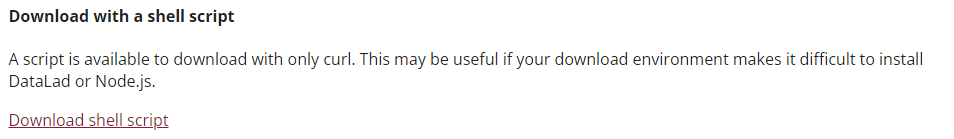

## Run this shell script

Now, copy the path of shell script and run it. This will download the dataset

In [ ]:
!sh /content/drive/MyDrive/FYPD_Dataset/ds003626-2.1.2.sh

This dataset is large and will take at least 20-30 minutes to download in Google Colab.

# **------------------------- Load Code from GitHub ----------------------**

This code will be used during data preprocessing.

In [2]:
!git clone https://github.com/SyedaMahamFahim/Inner_Speech_Dataset -q

# **------------------------- Preprocessing----------------------**

This stage may take 15 to 20 minutes.

The following files will be generated and saved:

1. EOG
2. EEG
3. Baseline
4. Report
5. Data

This section details each step and its output, and includes the complete code.

## == Single File - Each and every step with detail comment and output ==

### **Processing Variables**

In [ ]:
# Root where the raw data are stored in our case on google colab
root_dir = "/gdrive/MyDrive/FYPD_Dataset/"

# Root where the structured data will be saved - It can be changed and saved in other direction means after cleaning the data
save_dir = root_dir + "derivatives2/"

# Subjects and blacks
N_Subj_arr = [1,2,3,4,5,6,7,8,9,10]  # N_S---> No.of people
N_block_arr = [1,2,3]               # N_B---> No.of blocks/sessions

##################### Filtering
# Cut-off frequencies
Low_cut = 0.5
High_cut = 100

# 45 freq mili hai

# Apply a notch filter to remove interference at a specific frequency. here we apply a Notch filter in 50Hz

Notch_bool = True

# Downsampling rate
DS_rate = 4

##################### ICA
# If False, ICA is not applyed
ICA_bool = True
ICA_Components = None
ica_random_state = 23
ica_method = 'infomax'
max_pca_components = None
fit_params = dict(extended=True)

##################### EMG Control
low_f = 1
high_f = 20
# Slide window desing
# Window len (time in sec)
window_len = 0.5
# slide window step (time in sec)
window_step = 0.05

# Threshold
std_times = 3

# Baseline
t_min_baseline = 0
t_max_baseline = 15

# Trial time
t_min = 1
t_max = 3.5

# In[]: Fixed Variables
# Events ID
# Trials tag for each class.
# 31 = Arriba / Up
# 32 = Abajo / Down
# 33 = Derecha / Right
# 34 = Izquierda / Left
event_id = dict(Arriba = 31, Abajo = 32, Derecha = 33, Izquierda = 34)

#Baseline id
baseline_id = dict(Baseline = 13)

# Report initialization
report = dict(Age = 0, Gender = 0, Recording_time = 0,  Ans_R = 0, Ans_W = 0)

# Montage
Adquisition_eq = "biosemi128"
# Get montage
montage = mne.channels.make_standard_montage(Adquisition_eq)

# Extern channels
Ref_channels = ['EXG1', 'EXG2']

# Gaze detection
Gaze_channels = ['EXG3','EXG4']

# Blinks detection
Blinks_channels = ['EXG5','EXG6']

# Mouth Moving detection
Mouth_channels = ['EXG7','EXG8']

# Demographic information
Subject_age = [56,50,34,24,31,29,26,28,35,31]

Subject_gender = ['F','M','M','F','F','M','M','F','M','M']



### **File Path**

In [ ]:
file_name = "/content/drive/MyDrive/FYPD_Dataset/sub-01/ses-01/eeg/sub-01_ses-01_task-innerspeech_eeg.bdf"
N_S = 2
N_B =1
datatype="eeg"

### **Read Data from BDF File**





Using matplotlib as 2D backend.


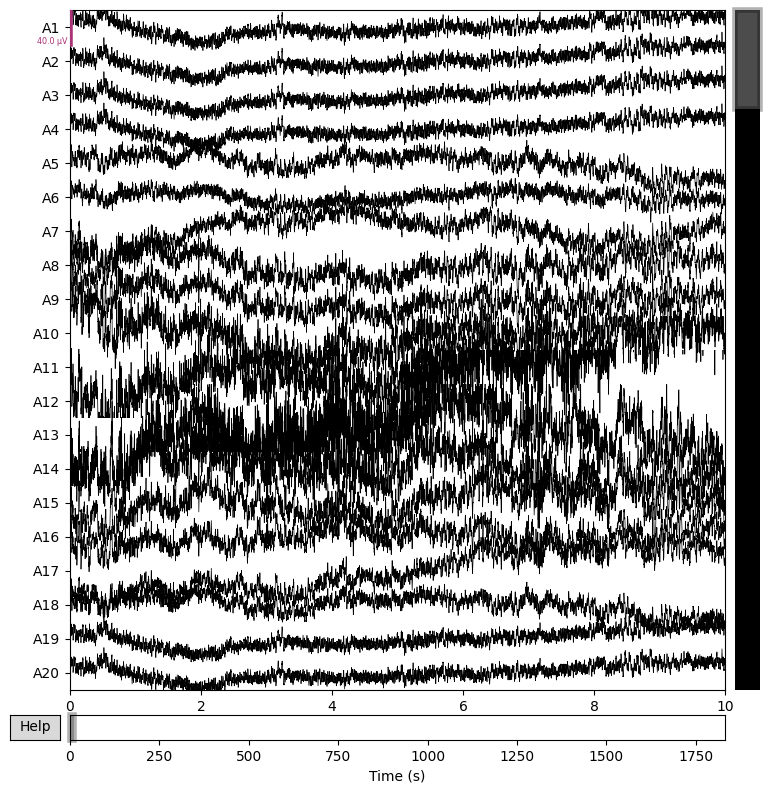

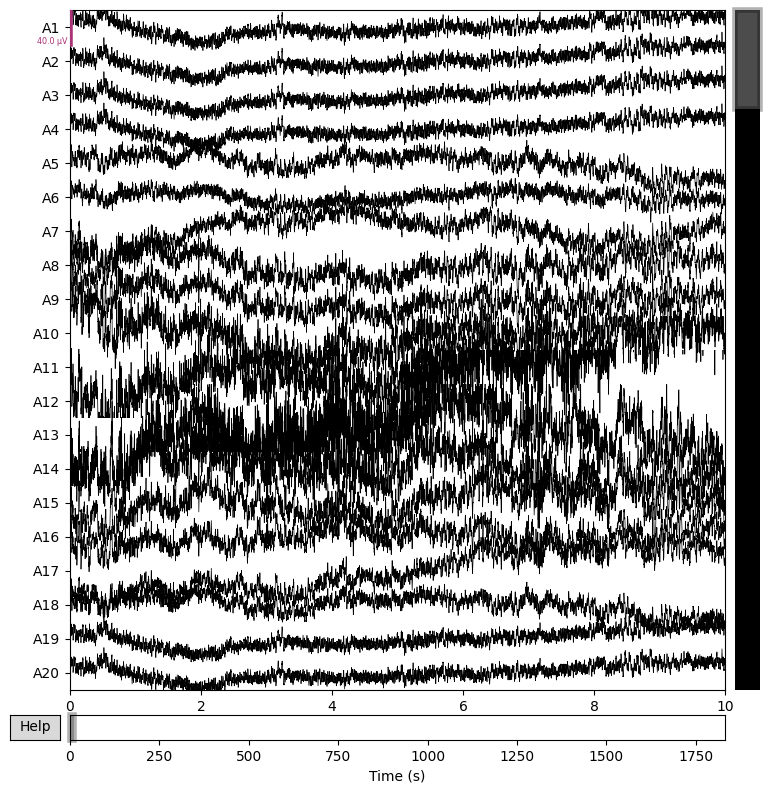

In [ ]:

# Load the data
rawdata = mne.io.read_raw_bdf(input_fname=file_name, preload=True,verbose='WARNING')


# Plot the raw EEG data
rawdata.plot()


### **Set Referencing**

Ref_channels = ['EXG1', 'EXG2']

Extern channels in an EEG device typically refer to channels that are external to the main EEG electrode array. These channels are used to capture additional physiological signals or external events that may be relevant to the EEG recording or experimental setup.

The main EEG electrode array consists of electrodes placed on the scalp to capture electrical activity generated by the brain. These electrodes record neural signals, which are then processed and analyzed to study brain activity.

Electromyography (EMG): These channels capture muscle activity. EMG signals can be useful for detecting muscle artifacts that may arise from facial muscles, neck muscles, or other muscles near the scalp.

In [ ]:
rawdata.set_eeg_reference(ref_channels=Ref_channels)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


Measurement date,"August 20, 2019 10:57:41 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,"136 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.00 Hz
Lowpass,208.00 Hz


### **Notch filter**
Notch filters are particularly useful for removing unwanted interference or noise at specific frequencies, a notch filter might be applied to remove interference caused by electrical equipment or other environmental factors, providing a cleaner representation of the underlying physiological signals. Here it is 50hz as mentioned in paper

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.7s


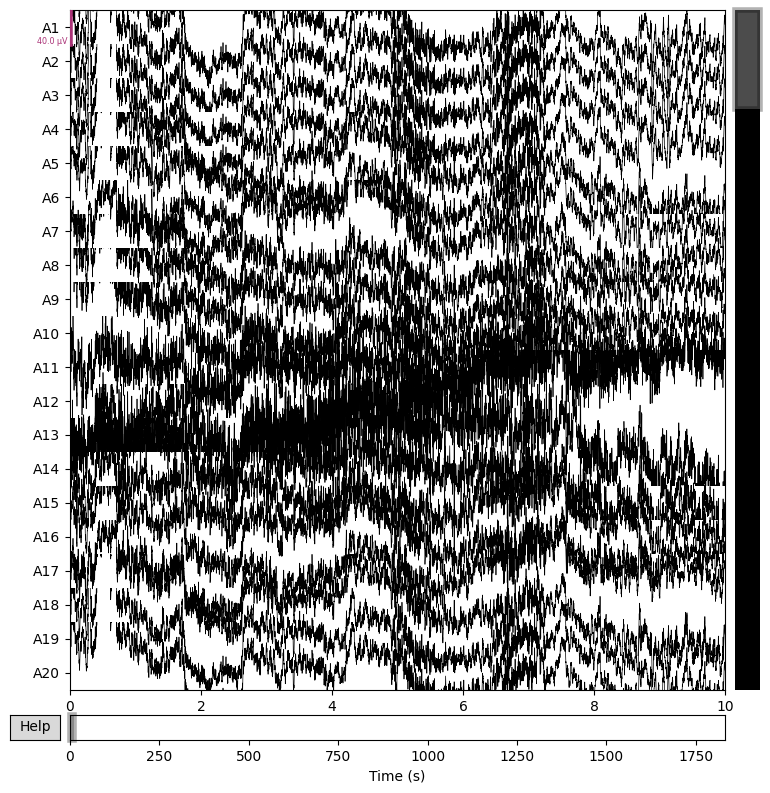

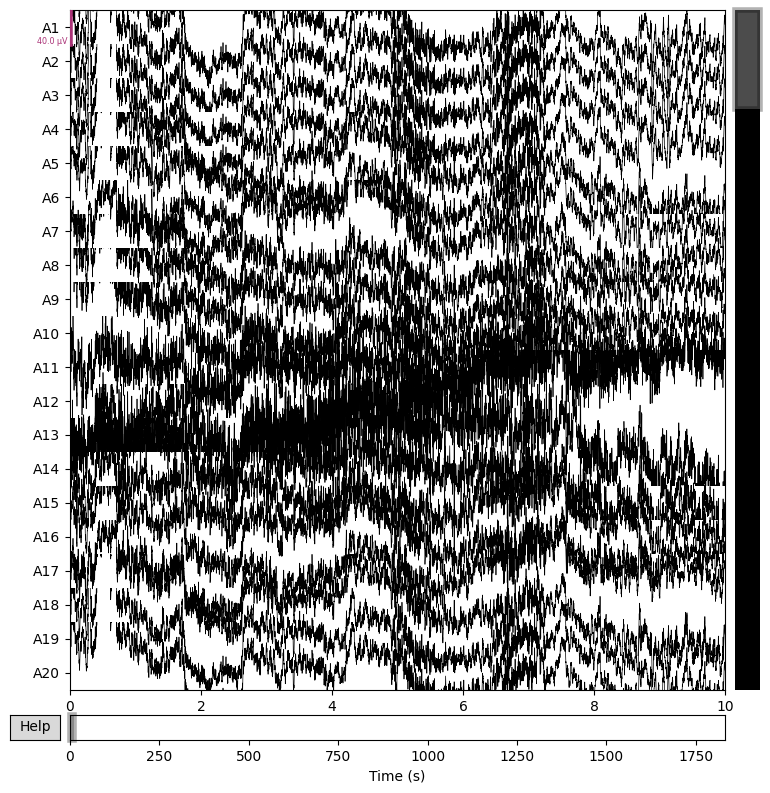

In [ ]:
if Notch_bool:
  # Notch filter
  rawdata = mne.io.Raw.notch_filter(rawdata,freqs=50)
rawdata.plot()

### **Filtering raw data**
Digital filtering
The data were filtered with a zero-phase bandpass finite impulse response filter using the corresponding MNE function. The lower and upper bounds were set to 0.5 and 100 Hz, respectively. This broad band filter aims to keep the data as raw as possible, allowing future users the possibility of filtering the data in their desired bands. A Notch filter in 50 Hz was also applied.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.5s


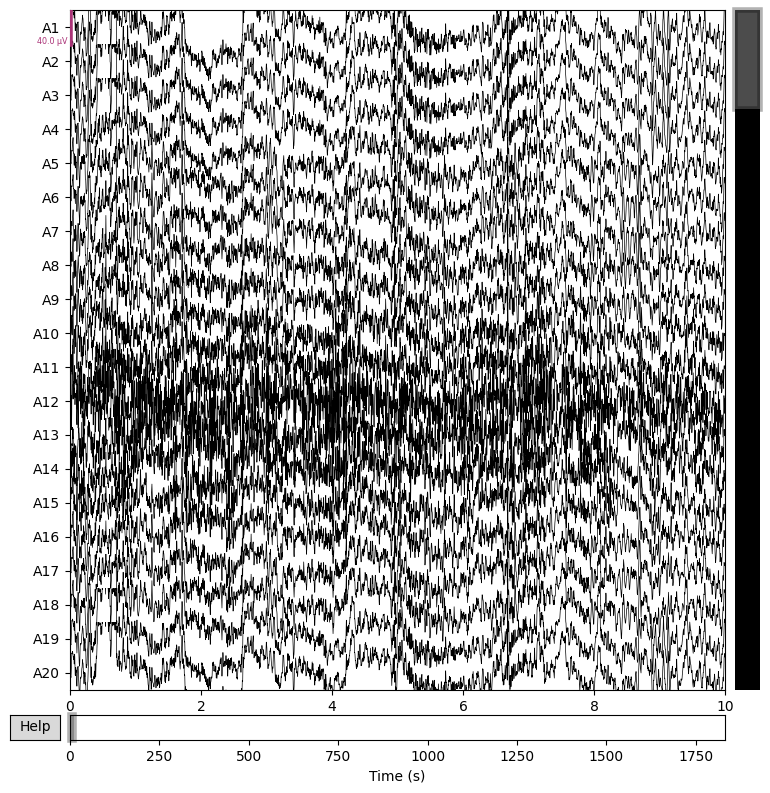

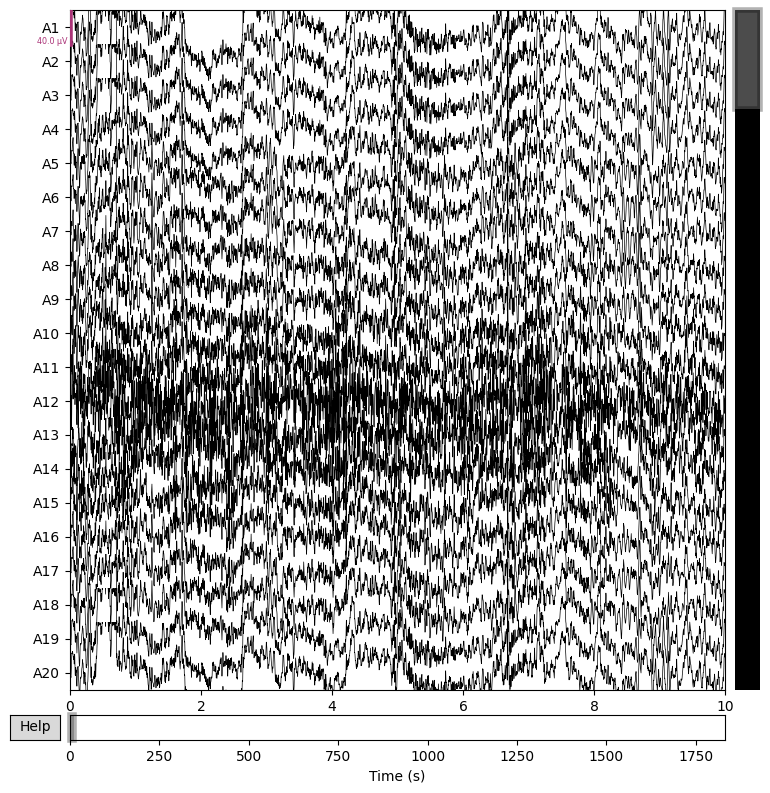

In [ ]:
rawdata.filter(Low_cut, High_cut)
rawdata.plot()

### **Get events**
Subject 10  on Block 1 have a spureos trigger
"Spurious triggers" refer to false or undesired events that are erroneously detected or recorded in the EEG data.

## **Raw data event tags number and meanings.**
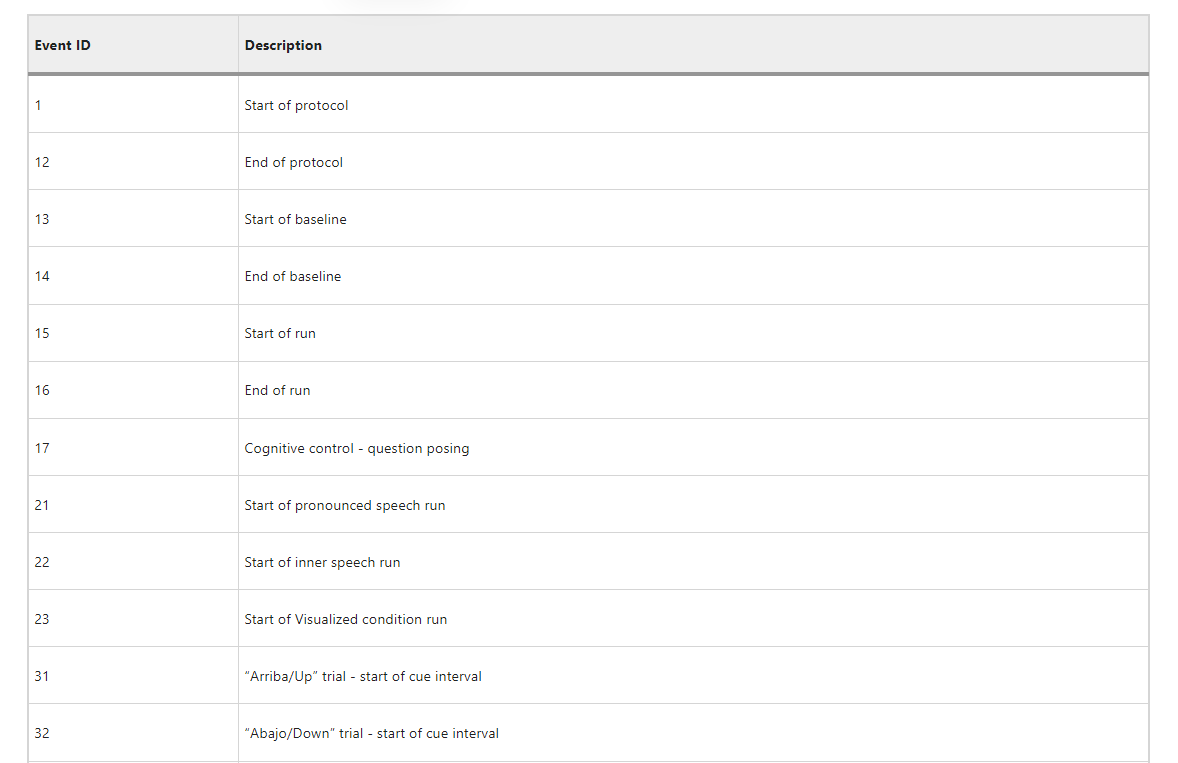

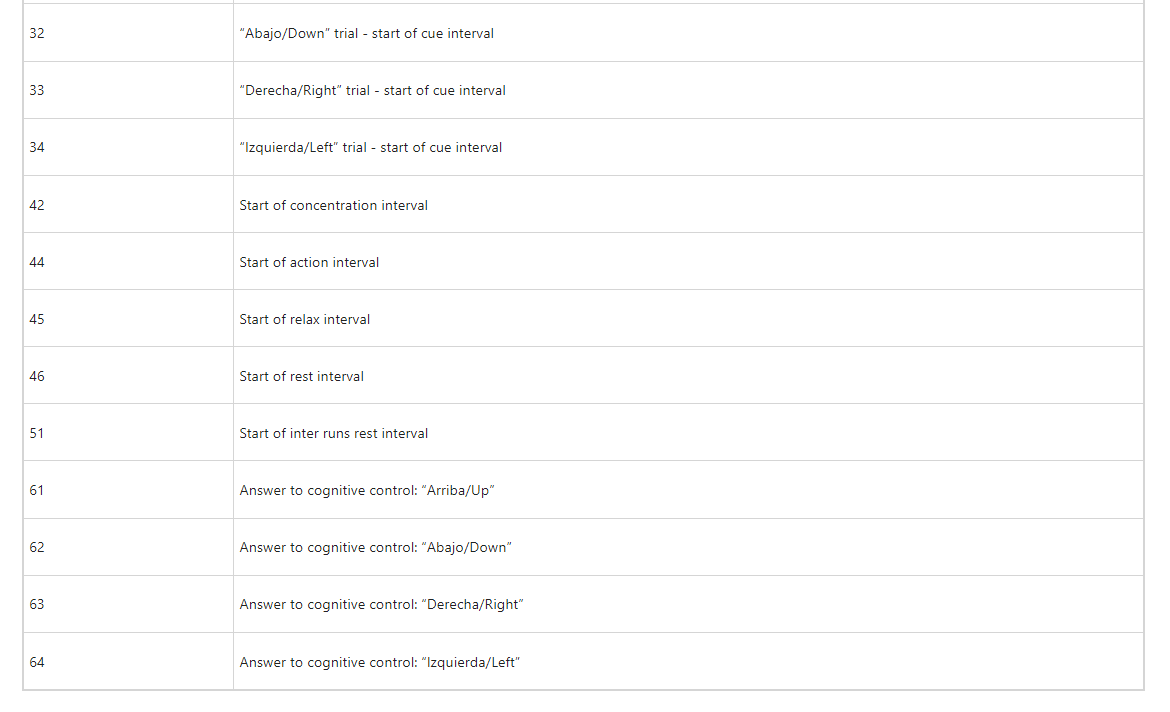

In [ ]:
if (N_S == 10 and N_B==1):
    events = mne.find_events(rawdata, initial_event = True, consecutive = True,min_duration = 0.002)
    # The different load of the events delet the spureos trigger but also the Baseline finish mark
else:
    events = mne.find_events(rawdata, initial_event=True, consecutive=True)

1113 events found on stim channel Status
Event IDs: [   11    12    13    14    15    16    17    21    22    23    31    32
    33    34    42    44    45    46    51    61    62    63    64 65536]


### **Check Baseline Events**
A spurious event, of unknown origin, with ID 65536 appeared at the beginning of the recording and also it randomly appeared within some sessions. This event has no correlation with any sent tag.

The raw events are stored in a three column matrix, where the first column contains the time stamp information, the second has the trigger information, and the third column contains the event ID.

In simpler terms, a "baseline event" in EEG data is like setting a starting point before something happens. Imagine you're measuring brain activity while someone watches flashing lights. Before the lights start flashing, you have a period where the brain is just doing its normal thing, not responding to anything special. This period is the "baseline event." It's like a reference point that helps you see how the brain's activity changes when the lights start flashing. By comparing brain activity during and after the baseline event, you can understand how the brain responds to different situations.

In [ ]:
def Check_Baseline_tags(events):
    # The "raw" events should star as [65536,11,13,14,15....]
    # The event 65536 is deleted later in the Events_Correction

    # The tag 14 (end of baseline) should be in the 4 row in the 3 column
    if events[3,2]!=14:
        # Add Baseline event
        # The baseline duration is 15 seconds, (sf=1024)
        # Add the event 15 seconds after the start Baseline cue
        time = events[2,0]+15*1024
        correction=[time,0,14]
        events= np.vstack([events,correction])
        events = events[events[:,0].argsort()]

    return events

events = Check_Baseline_tags(events)
print(events)

[[      0       0   65536]
 [   6283       0      11]
 [  16591       0      13]
 ...
 [1829105       0      46]
 [1829126       0      16]
 [1829156       0      12]]


### **Check and Correct event**
Extra events removed in this step such as event with ID 65536

In [ ]:
events=mne.pick_events(events, exclude=65536)

print(events)

[[   6283       0      11]
 [  16591       0      13]
 [  31976       0      14]
 ...
 [1829105       0      46]
 [1829126       0      16]
 [1829156       0      12]]


#### Initializes a NumPy array Events_code with zeros
The array has a shape of [len(events[:,2]) ,2], indicating the number of rows is the length of the third column (presumably event codes), and there are two columns.

This line assigns the values from the third column of the original events array to the first column of the Events_code array.
It's essentially copying the event codes to the first column of Events_code.

In [ ]:
Events_code=np.zeros([len(events[:,2]) ,2],dtype=int)
Events_code[:,0]=events[:,2]
len_Of_Events_Code=len (Events_code)
# events = Event_correction(events)
print("Events_code",Events_code)
print("len_Of_Events_Code",len_Of_Events_Code)

Events_code [[11  0]
 [13  0]
 [14  0]
 ...
 [46  0]
 [16  0]
 [12  0]]
len_Of_Events_Code 1112


#### Unique Events
This line assigns the values from the third column of the original events array to the first column of the Events_code array.
It's essentially copying the event codes to the first column of Events_code.

In [ ]:
Events_uniques=np.unique(Events_code[:,0]);
print("Events_uniques",Events_uniques)
Event_count=np.zeros([len(Events_uniques),2 ],dtype=int)
Event_count[:,0]= Events_uniques
print("Event_count",Event_count)


Events_uniques [11 12 13 14 15 16 17 21 22 23 31 32 33 34 42 44 45 46 51 61 62 63 64]
Event_count [[11  0]
 [12  0]
 [13  0]
 [14  0]
 [15  0]
 [16  0]
 [17  0]
 [21  0]
 [22  0]
 [23  0]
 [31  0]
 [32  0]
 [33  0]
 [34  0]
 [42  0]
 [44  0]
 [45  0]
 [46  0]
 [51  0]
 [61  0]
 [62  0]
 [63  0]
 [64  0]]


#### Count

In [ ]:
a=0
for i in Events_uniques:
  Event_count[a,1]= len(np.extract(Events_code==Events_uniques[a], Events_code)  )
  a=a+1
print(a)

23


#### CHECK EVENTS
WORKS ONLY IF ARE NOT 2 CONSECUTIVES TAGS MISSING

* for i in range(len(Events_code)):: This loop iterates over the rows of the Events_code array.
* Events_code[i, 1] = i: It assigns the value of i to the second column of the current row in Events_code.
* if Events_code[i, 0] == 42:: Checks if the value in the first column of the current row is equal to 42.
**Nested Conditions:**

If true, it checks if the next event (Events_code[i + 1, 0]) is

* one of the tags 31, 32, 33, or 34.
* If yes, it does nothing (passes).
* If not, it assumes that the tag is missing and tries to identify the missing tag based on the minimum occurrence count of the existing tags (31, 32, 33, 34).
* It prints a warning message, increments the Warnings counter, and appends information about the missing tag and its position to arrays.

In [ ]:
Warnings=0
# Warning missing code
Warnings_code=[0]
# Warning positions
Warnings_pos=[0]

for i in range (len (Events_code)):
    Events_code[i,1] = i

    # Check Tags  code = 31 32 33 34
    # Find the star mark
    if Events_code[i,0] == 42:
        # If the next mark is the tag is OK
        if (Events_code [i+1,0]==31 or Events_code [i+1,0]==32 or Events_code [i+1,0]==33 or Events_code [i+1,0]==34):
                # Do nothing
            pass
            # If the next mark is the mark for concentration the tag is missing
        elif Events_code [i+1,0]==44:
            min_tag= min(Event_count[Event_count[:,0]==31,1],Event_count[Event_count[:,0]==32,1],Event_count[Event_count[:,0]==33,1],Event_count[Event_count[:,0]==34,1])
            miss_tag=Event_count[Event_count[:,1]==min_tag,0]
            print('Warnings, miss '+str(miss_tag)+' at i = '+str(i))
            Warnings=Warnings+1
            Warnings_code= np.append(Warnings_code, miss_tag)
            Warnings_pos=np.append(Warnings_pos,i)
    if Events_code[i,0]==46:
        if (Events_code [i+1,0]==42 or Events_code [i+1,0]==16 or Events_code [i+1,0]==17):
            pass
        elif (Events_code [i+1,0]==61 or Events_code[i+1,0]==62 or Events_code[i+1,0]==63 or Events_code[i+1,0]==64):
            print('Warning, miss Question at i = '+str(i))
            Warnings=Warnings+1
            Warnings_code= np.append(Warnings_code, 17)
            Warnings_pos=np.append(Warnings_pos,i)
        else:
            print('Warning, miss start at i = '+str(i))
            Warnings=Warnings+1
            Warnings_code= np.append(Warnings_code, 42)
            Warnings_pos=np.append(Warnings_pos,i)


#### Full Event Correction Function Code

In [ ]:
def Event_correction(events):


    # Exclude this tag from the events
    events=mne.pick_events(events, exclude=65536)

    # Counts the events ===================================================
    # Initialize vars
    Events_code=np.zeros([len(events[:,2]) ,2],dtype=int)
    Events_code[:,0]=events[:,2]

    Events_uniques=np.unique(Events_code[:,0]);

    Event_count=np.zeros([len(Events_uniques),2 ],dtype=int)
    Event_count[:,0]= Events_uniques

    # Count
    a=0
    for i in Events_uniques:
       Event_count[a,1]= len(np.extract(Events_code==Events_uniques[a], Events_code)  )
       a=a+1

# CHECK EVETS =========================================================
#         WORKS ONLY IF ARE NOT 2 CONSECUTIVES TAGS MISSING
# =============================================================================
    Warnings=0
    # Warning missing code
    Warnings_code=[0]
    # Warning positions
    Warnings_pos=[0]

    for i in range (len (Events_code)):
        Events_code[i,1] = i

        # Check Tags  code = 31 32 33 34
        # Find the star mark
        if Events_code[i,0] == 42:
            # If the next mark is the tag is OK
            if (Events_code [i+1,0]==31 or Events_code [i+1,0]==32 or Events_code [i+1,0]==33 or Events_code [i+1,0]==34):
                # Do nothing
                pass
            # If the next mark is the mark for concentration the tag is missing
            elif Events_code [i+1,0]==44:
                min_tag= min(Event_count[Event_count[:,0]==31,1],Event_count[Event_count[:,0]==32,1],Event_count[Event_count[:,0]==33,1],Event_count[Event_count[:,0]==34,1])
                miss_tag=Event_count[Event_count[:,1]==min_tag,0]
                print('Warnings, miss '+str(miss_tag)+' at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, miss_tag)
                Warnings_pos=np.append(Warnings_pos,i)

        # Check start and question   code=42,17
        if Events_code[i,0]==46:
            if (Events_code [i+1,0]==42 or Events_code [i+1,0]==16 or Events_code [i+1,0]==17):
                pass
            elif (Events_code [i+1,0]==61 or Events_code[i+1,0]==62 or Events_code[i+1,0]==63 or Events_code[i+1,0]==64):
                print('Warning, miss Question at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, 17)
                Warnings_pos=np.append(Warnings_pos,i)
            else:
                print('Warning, miss start at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, 42)
                Warnings_pos=np.append(Warnings_pos,i)

        if (Events_code [i,0]==21 or Events_code[i,0]==22 or Events_code[i,0]==23):
            if Events_code [i+1,0]==42:
                pass
            else:
                print('Warning, miss start at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, 42)
                Warnings_pos=np.append(Warnings_pos,i)


        if (Events_code [i,0]==61 or Events_code[i,0]==62 or Events_code[i,0]==63 or Events_code[i,0]==64):
            if (Events_code [i+1,0]==42 or Events_code [i+1,0]==16)  :
                pass
            else:
                print('Warning, miss start at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, 42)
                Warnings_pos=np.append(Warnings_pos,i)

        # Check  code 44
        if (Events_code [i,0]==31 or Events_code [i,0]==32 or Events_code [i,0]==33 or Events_code [i,0]==34):
            if Events_code [i+1,0]==44:
                pass
            elif Events_code [i+1,0]==45:
                print('Warning, miss Usefull interval at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, 44)
                Warnings_pos=np.append(Warnings_pos,i)


        # Check code 45
        if Events_code[i,0]==44:
            if Events_code [i+1,0]==45:
                pass
            elif Events_code [i+1,0]==46:
                print('Warning, miss Concentration interval at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, 45)
                Warnings_pos=np.append(Warnings_pos,i)

        # Check Code 46
        if Events_code[i,0]==45:
            if Events_code [i+1,0]==46:
                pass
            else:
                print('Warning, miss Rest interval at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, 46)
                Warnings_pos=np.append(Warnings_pos,i)


        # Check Ans Code 65
        if Events_code[i,0]==17:
            if (Events_code [i+1,0]==61 or Events_code[i+1,0]==62 or Events_code[i+1,0]==63 or Events_code[i+1,0]==64):
                pass
            else:
                print('Warning, miss Answerd at i = '+str(i))
                Warnings=Warnings+1
                Warnings_code= np.append(Warnings_code, 61)
                Warnings_pos=np.append(Warnings_pos,i)

# =============================================================================
# Correcting the events============================


    if Warnings==0:
        print('No Warnings, no corrections of events')
        Events_code_fix= Events_code
        Corrected_events=events
    else:
        print ("Correcting Events")
        # Adding missing values
        Warnings_code=np.delete(Warnings_code,0)
        Warnings_pos=np.delete(Warnings_pos,0)

        corrections=np.zeros([Warnings,3],dtype=int)

        corrections[:,2]=Warnings_code

        for i in range (len(corrections)):

               # If a 42 is missing, I was seaching after a 46
               if corrections[i,2]== 42:
                   corrections[i,0]=events[Warnings_pos[i],0]+1945;

               # If a 44 is missing, I was seaching after a 45
               elif corrections[i,2]== 44:
                   corrections[i,0]=events[Warnings_pos[i],0]+2594;

               #If a 44 is missing, I was seaching after a 46
               elif corrections[i,2]== 45:
                   corrections[i,0]=events[Warnings_pos[i],0]+1075;

               # If a 46 is missing, I was seaching after a 45 un 46
               elif corrections[i,2]== 46:
                   corrections[i,0]=events[Warnings_pos[i],0]+1075;

               # If a tag is missing, I was seaching after a 42
               elif corrections[i,2]== 17:
                   corrections[i,0]=events[Warnings_pos[i],0]+2092;

               # If a tag is missing, I was seaching after a 42
               elif corrections[i,2]== 61:
                   corrections[i,0]=events[Warnings_pos[i],0]+2092;
               # If a tag is missing, I was seaching after a 42
               elif corrections[i,2]== miss_tag:
                   corrections[i,0]=events[Warnings_pos[i],0]+563;


        #Append the missing events
        Corrected_events=np.append(events,corrections,axis=0)
        # Sort the events by the time stamp
        Corrected_events = Corrected_events[Corrected_events[:,0].argsort()]


#CHECK CORRECTED EVETS ===============================================
        Warnings=0
        Warnings_code=[0]
        Warnings_pos=[0]

        Events_code_fix=np.zeros([len(Corrected_events[:,2]) ,2],dtype=int)
        Events_code_fix[:,0]=Corrected_events[:,2]


        for i in range (len (Events_code_fix)):
            Events_code_fix[i,1]=i

            # Check Tags    code= 31 32 33 34
            # Find the star mark
            if Events_code_fix[i,0]==42:
                # If the next mark is the tag is OK
                if (Events_code_fix [i+1,0]==31 or Events_code_fix [i+1,0]==32 or Events_code_fix [i+1,0]==33 or Events_code_fix [i+1,0]==34):
                    pass
                # If the next mark is the mark for concentration the tag is missing
                elif Events_code_fix [i+1,0]==44:
                    # WORKS ONLY IF JUST ONE TAG IS MISSING !!!!
                    min_tag= min(Event_count[Event_count[:,0]==31,1],Event_count[Event_count[:,0]==32,1],Event_count[Event_count[:,0]==33,1],Event_count[Event_count[:,0]==34,1])
                    miss_tag=Event_count[Event_count[:,1]==min_tag,0]
                    print('Warnings, miss '+str(miss_tag)+' at i = '+str(i))
                    Warnings=Warnings+1
                    Warnings_code= np.append(Warnings_code, miss_tag)
                    Warnings_pos=np.append(Warnings_pos,i)

            # Check start      code=42
            if Events_code_fix[i,0]==46:
                if (Events_code_fix [i+1,0]==42 or Events_code_fix [i+1,0]==16 or Events_code_fix [i+1,0]==17):
                    pass
                else:
                    print('Warning, miss start at i = '+str(i))
                    Warnings=Warnings+1
                    Warnings_code= np.append(Warnings_code, 42)
                    Warnings_pos=np.append(Warnings_pos,i)

            if (Events_code_fix [i,0]==21 or Events_code_fix[i,0]==22 or Events_code_fix[i,0]==23):
                if Events_code_fix [i+1,0]==42:
                    pass
                else:
                    print('Warning, miss start at i = '+str(i))
                    Warnings=Warnings+1
                    Warnings_code= np.append(Warnings_code, 42)
                    Warnings_pos=np.append(Warnings_pos,i)


            if (Events_code_fix [i,0]==61 or Events_code_fix[i,0]==62 or Events_code_fix[i,0]==63 or Events_code_fix[i,0]==64):
                if (Events_code_fix [i+1,0]==42 or Events_code_fix [i+1,0]==16):
                    pass
                else:
                    print('Warning, miss start at i = '+str(i))
                    Warnings=Warnings+1
                    Warnings_code= np.append(Warnings_code, 42)
                    Warnings_pos=np.append(Warnings_pos,i)

            # Check usefull code 44
            if (Events_code_fix [i,0]==31 or Events_code_fix [i,0]==32 or Events_code_fix [i,0]==33 or Events_code_fix [i,0]==34):
                if Events_code_fix [i+1,0]==44:
                    pass
                elif Events_code_fix [i+1,0]==45:
                    print('Warning, miss Usefull interval at i = '+str(i))
                    Warnings=Warnings+1
                    Warnings_code= np.append(Warnings_code, 44)
                    Warnings_pos=np.append(Warnings_pos,i)


            # Check Usefull code 45
            if Events_code_fix[i,0]==44:
                if Events_code_fix [i+1,0]==45:
                    pass
                elif Events_code_fix [i+1,0]==46:
                    print('Warning, miss Concentration interval at i = '+str(i))
                    Warnings=Warnings+1
                    Warnings_code= np.append(Warnings_code, 45)
                    Warnings_pos=np.append(Warnings_pos,i)

            # Code 46
            if Events_code_fix[i,0]==45:
                if Events_code_fix [i+1,0]==46:
                    pass
                else:
                    print('Warning, miss Rest interval at i = '+str(i))
                    Warnings=Warnings+1
                    Warnings_code= np.append(Warnings_code, 46)
                    Warnings_pos=np.append(Warnings_pos,i)

            # Code 17
            if Events_code_fix[i,0]==17:
                if (Events_code_fix [i+1,0]==61 or Events_code_fix[i+1,0]==62 or Events_code_fix[i+1,0]==63 or Events_code_fix[i+1,0]==64):
                    pass
                else :
                    print('Warning, miss Answerd at i = '+str(i))
                    Warnings=Warnings+1
                    Warnings_code= np.append(Warnings_code, 61)
                    Warnings_pos=np.append(Warnings_pos,i)


        # correcting the events
        if Warnings==0:
            print('Taggs OK')

# CHECK FIXED EVENTS

    # Initialize vars
    Events_uniques_fix=np.unique(Events_code_fix[:,0]);

    Event_count_fix=np.zeros([len(Events_uniques_fix),2 ],dtype=int)
    Event_count_fix[:,0]= Events_uniques_fix

    # Count the events
    a=0
    for i in Events_uniques_fix:
       Event_count_fix[a,1]= len(np.extract(Events_code_fix[:,0]==Events_uniques_fix[a], Events_code_fix[:,0])  )
       a=a+1


# SANITY CHECK AFTER FIX EVETS ===============================================

    # Check if the Begining, End, Baseline start and end are OK
    if (Event_count_fix[Event_count_fix[:,0]==11,1]==1 and Event_count_fix[Event_count_fix[:,0]==12,1]==1 and Event_count_fix[Event_count_fix[:,0]==13,1]==1 and Event_count_fix[Event_count_fix[:,0]==14,1]==1):
        print('Start OK')
    else:
        raise Exception("Missing Stars")

    # Check if blocks are OK
    if Event_count_fix[Event_count_fix[:,0]==15,1] == Event_count_fix[Event_count_fix[:,0]==16,1] == Event_count_fix[Event_count_fix[:,0]==51,1]+1 :
        print('Blocks OK')
    else:
        raise Exception("Missing Blocks")

    # Check if Tags OK
    if Event_count_fix[Event_count_fix[:,0]==31,1] == Event_count_fix[Event_count_fix[:,0]==32,1] == Event_count_fix[Event_count_fix[:,0]==33,1] == Event_count_fix[Event_count_fix[:,0]==34,1]:
        print('Tags OK')
    else:
        raise Exception("Missing Tags")

    # Check if Marks OK
    if Event_count_fix[Event_count_fix[:,0]==42,1] == Event_count_fix[Event_count_fix[:,0]==44,1] == Event_count_fix[Event_count_fix[:,0]==45,1] == Event_count_fix[Event_count_fix[:,0]==46,1]:
        print('Marks OK')
    else:
        raise Exception("Missing Marks")

    # Check if Questions OK
    if len (Event_count_fix[Event_count_fix[:,0]==61,1])==0:
        Q_61 = 0
    else  :
        Q_61 = Event_count_fix[Event_count_fix[:,0]==61,1][0]

    if len (Event_count_fix[Event_count_fix[:,0]==62,1])==0:
        Q_62 = 0
    else  :
        Q_62 = Event_count_fix[Event_count_fix[:,0]==62,1][0]

    if len (Event_count_fix[Event_count_fix[:,0]==63,1])==0:
        Q_63 = 0
    else  :
        Q_63 = Event_count_fix[Event_count_fix[:,0]==63,1][0]

    if len (Event_count_fix[Event_count_fix[:,0]==64,1])==0:
        Q_64 = 0
    else  :
        Q_64 = Event_count_fix[Event_count_fix[:,0]==64,1][0]


    if Event_count_fix[Event_count_fix[:,0]==17,1][0] == (Q_61+Q_62+Q_63+Q_64 ):
        print('Cognitive control OK')
    else:
        raise Exception("Missing Congnitive Control Question/Answer")

    return Corrected_events

events = Event_correction (events=events)

Warning, miss Rest interval at i = 23
Correcting Events
Taggs OK
Start OK
Blocks OK
Tags OK
Marks OK
Cognitive control OK


### **Replace the raw events with the new corrected events**

In [ ]:
rawdata.event = events
print(rawdata.event)

[[   6283       0      11]
 [  16591       0      13]
 [  31976       0      14]
 ...
 [1829105       0      46]
 [1829126       0      16]
 [1829156       0      12]]


### **Updating Report Dict**

In [ ]:
report['Recording_time'] = int(np.round(rawdata.last_samp/rawdata.info['sfreq']))

### **Cognitive Control**

Cognitive control refers to the mental processes and mechanisms that allow individuals to regulate and manage their thoughts, actions, and emotions in order to achieve specific goals. It involves the ability to flexibly adapt to changing demands, inhibit inappropriate responses, focus attention, and engage in goal-directed behavior.

Cognitive control in EEG involves neural processes that regulate mental functions during cognitive tasks. Event-related potentials (ERPs) and frequency bands like theta and alpha are analyzed to understand attention, memory, and control. Changes in amplitude and connectivity patterns provide insights into cognitive dynamics, with source localization identifying key brain regions such as the prefrontal cortex.

In [ ]:
def Cognitive_control_check(events):
    # Check Answers
    Ans_R=0;
    Ans_W=0;

    Events_uniques=np.unique(events[:,2])
    Event_count=np.zeros([len(Events_uniques),2 ],dtype=int)
    Event_count[:,0]= Events_uniques
    # Count the events
    a=0
    for i in Events_uniques:
       Event_count[a,1]= len(np.extract(events[:,2]==Events_uniques[a], events[:,2])  )
       a=a+1


    for i in range(len(events)):
       if  events[i,2]==17:
           if events[i+1,2]==events[i-4,2]+30:
               Ans_R=Ans_R+1
           else:
               Ans_W=Ans_W+1


    if Event_count[Event_count[:,0]==17,1] == Ans_R+Ans_W:
        if Event_count[Event_count[:,0]==17,1] == Ans_R:
            print('All Answers are OK')
        else:
            print('Warning, '+str(Ans_W)+' of ' + str(Event_count[Event_count[:,0]==17,1]) + ' Answers are wrong')
    else:
        raise Exception("Missing Congnitive Control Question/Answer")


    return Ans_R , Ans_W

report['Ans_R'] , report['Ans_W'] = Cognitive_control_check(events)

Warning, 2 of [45] Answers are wrong


### **EXG Channels for saving**
The picks_types function is used to select channels based on their types, and in this case, channels labeled as EOG ('EXG1', 'EXG2', ..., 'EXG8') are used.

* **Extern channels**: EXG1, EXG2
* **Gaze detection**: EXG3, EXG4
* **Blinks detection**: EXG5, EXG6
* **Mouth Moving detection**: EXG7, EXG8


**Epochs**
The goal of using epochs is to isolate and analyze brain activity patterns associated with specific events or experimental conditions

In EEG data analysis, think of an "epoch" like a short movie clip captured from continuous brain recordings. Imagine you're watching a movie, and you mark specific moments—those are your events. An epoch is the snippet of the movie centered around each marked moment. It's like zooming in on the brain's activity during key events, helping scientists study how the brain responds to different situations.


In [ ]:
picks_eog = mne.pick_types(
    rawdata.info,
    eeg = False,
    stim = False,
    include = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'])

epochsEOG = mne.Epochs(
    rawdata,
    events,
    event_id = event_id,
    tmin = -0.5,
    tmax = 4,
    picks = picks_eog,
    preload = True,
    detrend = 0,
    decim = DS_rate)

Not setting metadata
200 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 200 events and 4609 original time points (prior to decimation) ...


<ipython-input-21-ffc87a6a5bde>:7: RuntimeWarning: The measurement information indicates a low-pass frequency of 100.0 Hz. The decim=4 parameter will result in a sampling frequency of 256.0 Hz, which can cause aliasing artifacts.
  epochsEOG = mne.Epochs(


0 bad epochs dropped


### **Epoching and decimating EEG**
The data were decimated four times, obtaining a final sampling rate of 254 Hz. Then, the continuous recorded data were epoched, keeping only the 4.5 s length signals corresponding to the time window between the beginning of the concentration interval and the end of the relaxation interval. The matrices of dimension [channels × samples] corresponding to each trial, were stacked in a final tensor of size [trials × channels × samples].

In [ ]:
picks_eeg = mne.pick_types(
    rawdata.info,
    eeg=True,
    exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'],
    stim = False)

epochsEEG = mne.Epochs(
    rawdata,
    events,
    event_id = event_id,
    tmin = -0.5,
    tmax = 4,
    picks = picks_eeg,
    preload = True,
    detrend = 0,
    decim = DS_rate,
    baseline = None)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 4609 original time points (prior to decimation) ...


<ipython-input-22-36810ded7b61>:7: RuntimeWarning: The measurement information indicates a low-pass frequency of 100.0 Hz. The decim=4 parameter will result in a sampling frequency of 256.0 Hz, which can cause aliasing artifacts.
  epochsEEG = mne.Epochs(


0 bad epochs dropped


###  **Independent Component Analysis (ICA)**


Independent Component Analysis (ICA) is a signal processing technique used in EEG data analysis to separate a multichannel signal into additive, independent components.

The goal is to identify and remove artifacts from the EEG data, such as eye blinks, muscle activity, or other unwanted signals.


ICA is a powerful tool for enhancing the quality of EEG data by isolating and removing unwanted artifacts, allowing for a more accurate investigation of brain activity.

Here's a step-by-step explanation of ICA processing in the context of EEG data:

1. **Signal Decomposition:**
   - EEG data is collected from multiple channels, each recording a mix of neural and non-neural signals.
   - ICA decomposes the multichannel EEG signal into independent components, aiming to represent distinct underlying sources.

2. **Component Identification:**
   - Independent components represent different processes contributing to the recorded signals.
   - Some components correspond to neural activity, while others may represent artifacts like eye movements or muscle activity.

3. **Artifact Removal:**
   - Components related to artifacts are identified based on their spatial and temporal characteristics.
   - These artifact-related components can be removed, leaving behind the components associated with neural activity.

4. **Reconstruction:**
   - The cleaned EEG signal is reconstructed using the remaining independent components.
   - The reconstructed signal ideally reflects the neural activity, free from unwanted artifacts.

5. **Data Interpretation:**
   - Researchers and clinicians can now analyze the EEG data with increased confidence in the accuracy of the neural signals.



In [ ]:
# sir, represent
if ICA_bool:
    # Get a full trials including EXG channels
    picks_vir = mne.pick_types(
        rawdata.info,
        eeg=True,
        include=['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'],
        stim=False)
    epochsEEG_full=mne.Epochs(rawdata,
                              events,
                              event_id,
                              tmin=-0.5,
                              tmax=4,
                              picks=picks_vir,
                              preload=True,
                              detrend=0,
                              decim=DS_rate,
                              baseline = None)


    # Liberate Memory for ICA processing
    del rawdata

    # Creating the ICA object
    ica=mne.preprocessing.ICA(n_components=ICA_Components,random_state=ica_random_state, method=ica_method,fit_params=fit_params)

    # Fit ICA, calculate components
    ica.fit(epochsEEG)
    ica.exclude = []

    # Detect sources by correlation
    exg_inds_EXG3, scores_ica = ica.find_bads_eog(epochsEEG_full, ch_name='EXG3')  # find via correlation
    ica.exclude.extend(exg_inds_EXG3)

    # Detect sources by correlation
    exg_inds_EXG4, scores_ica = ica.find_bads_eog(epochsEEG_full, ch_name='EXG4')  # find via correlation
    ica.exclude.extend(exg_inds_EXG4)

            # Detect sources by correlation
    exg_inds_EXG5, scores_ica = ica.find_bads_eog(epochsEEG_full, ch_name='EXG5')  # find via correlation
    ica.exclude.extend(exg_inds_EXG5)

    # Detect sources by correlation
    exg_inds_EXG6, scores_ica = ica.find_bads_eog(epochsEEG_full, ch_name='EXG6')  # find via correlation
    ica.exclude.extend(exg_inds_EXG6)

    # Detect sources by correlation
    exg_inds_EXG7, scores_ica = ica.find_bads_eog(epochsEEG_full, ch_name='EXG7')  # find via correlation
    ica.exclude.extend(exg_inds_EXG7)

    # Detect sources by correlation
    exg_inds_EXG8, scores_ica = ica.find_bads_eog(epochsEEG_full, ch_name='EXG8')  # find via correlation
    ica.exclude.extend(exg_inds_EXG8)

    print("Appling ICA")
    ica.apply(epochsEEG)

NameError: name 'rawdata' is not defined

### **Create New Directory to Save File**

In [ ]:
save_dir= "/content/drive/MyDrive/FYPD_Dataset/saveDataNew"
def Ensure_dir(dir_name):
    import os
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

# file_path = save_dir + str(N_S) + '/ses-0'+ str(N_B)
file_path='/content/drive/MyDrive/FYPD_Dataset/saveData2/ses-01'
# Ensure_dir(file_path)

### **Save EEG FILE**

In [ ]:
file_name = file_path + '/' +str(N_S)  + '_ses-0' + str(N_B) + '_eeg-epo.fif'
print(file_name)
# epochsEEG.save(file_name, fmt='double', split_size='2GB', overwrite=True)

### **Events_analysis**
1. Add_condition_tag
2. Add_block_tag
3. Delete_trigger
4. Standarized_labels

#### Add Condition Tag

In [ ]:
def Add_condition_tag(events):

    # Create the tag Vector
    Mod_tag=0
    Mod=0
    for i in range(len(events)):

       if  events[i,2]==21:
           Mod=0

       if  events[i,2]==22:
           Mod=1

       if  events[i,2]==23:
           Mod=2

       Mod_tag = np.append(Mod_tag,Mod)

    Mod_tag= np.delete(Mod_tag,0)
    # Stack with the event matrix
    events_taged= np.hstack((events,Mod_tag[:,None]))

    events_taged=mne.pick_events(events_taged, include=[31,32,33,34])

    return events_taged

events = Add_condition_tag(events)

#### Add Block Tag

In [ ]:
def Add_block_tag(events, N_B):
    # Create the tag Vector
    Stage_tag=N_B*np.ones(events.shape[0],dtype=int)
    # Stack with the event matrix
    events_taged= np.hstack((events,Stage_tag[:,None]))

    return events_taged

events = Add_block_tag(events,N_B=N_B)

#### Delete Trigger

In [ ]:
def Delete_trigger(events):

    events=np.delete(events,1,axis =1)

    return events

events = Delete_trigger(events)

#### Standarized Labels

In [ ]:
def Standarized_labels(events):
    # Change the labels
    # 31 -> 0   "Arriba"    / "Up"
    # 32 -> 1   "Abajo"     / "Down"
    # 33 -> 2   "Derecha"   / "Rigth"
    # 34 -> 3   "Izquierda" / "Left"
    events[:,1]=events[:,1]-31

    return events

events = Standarized_labels(events)

#### Save events

In [ ]:
file_name = file_path + '/' +str(N_S) + '_ses-0' + str(N_B) + '_events.dat'
events.dump(file_name)

### **Ad hoc correction subject 3**
Subject S03 inform in block 1 he did not realice the inner speech paradigm. Instead he perform the visualized paradigm.

In [ ]:
def adhoc_Subject_3 (root_dir,verbose=True):

  if N_S == 1 and N_B == 3:
      Y_S3 = np.load(file_name, allow_pickle=True)

      # Correct the 40 trials where the subject executed a different paradigm
      Y_S3[80:120, 2] = 2

      if verbose:
          # Check if only 40 trials of Pronounced had left
          if (
              np.count_nonzero(Y_S3[:, 2] == 0) == 40
              and np.count_nonzero(Y_S3[:, 2] == 1) == 40
              and np.count_nonzero(Y_S3[:, 2] == 2) == 120
          ):
              print("AdHoc Correction Subject 3 Block 1")
          else:
              raise Exception("Correction fail")

      Y_S3.dump(file_name)

adhoc_Subject_3(root_dir=root_dir)


## == Whole code of Preprocessing in one section - Multiple Files ==

In [ ]:
# Imports modules
import mne
import pickle
import numpy as np

from Inner_Speech_Dataset.Python_Processing.Events_analysis import Event_correction, add_condition_tag, add_block_tag
from Inner_Speech_Dataset.Python_Processing.Events_analysis import check_baseline_tags, delete_trigger
from Inner_Speech_Dataset.Python_Processing.Events_analysis import cognitive_control_check, standardize_labels
from Inner_Speech_Dataset.Python_Processing.Data_extractions import extract_subject_from_bdf
from Inner_Speech_Dataset.Python_Processing.Utilitys import ensure_dir
from Inner_Speech_Dataset.Python_Processing.AdHoc_modification import adhoc_subject_3
from Inner_Speech_Dataset.Python_Processing.EMG_Control import EMG_control_single_th

# Processing Variables

# Root where the raw data are stored
root_dir = '/content/drive/MyDrive/FYPD_Dataset/'

# Root where the structured data will be saved
# It can be changed and saved in other direction
save_dir = root_dir + "derivatives/"

# Subjects and blacks
N_Subj_arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N_block_arr = [1, 2, 3]

# #################### Filtering
# Cut-off frequencies
Low_cut = 0.5
High_cut = 100

# Notch filter in 50Hz
Notch_bool = True

# Downsampling rate
DS_rate = 4

# #################### ICA
# If False, ICA is not applyed
ICA_bool = True
ICA_Components = None
ica_random_state = 23
ica_method = 'infomax'
max_pca_components = None
fit_params = dict(extended=True)

# #################### EMG Control
low_f = 1
high_f = 20
# Slide window desing
# Window len (time in sec)
window_len = 0.5
# slide window step (time in sec)
window_step = 0.05

# Threshold for EMG control
std_times = 3

# Baseline
t_min_baseline = 0
t_max_baseline = 15

# Trial time
t_min = 1
t_max = 3.5

# In[]: Fixed Variables
# Events ID
# Trials tag for each class.
# 31 = Arriba / Up
# 32 = Abajo / Down
# 33 = Derecha / Right
# 34 = Izquierda / Left
event_id = dict(Arriba=31, Abajo=32, Derecha=33, Izquierda=34)

# Baseline id
baseline_id = dict(Baseline=13)

# Report initialization
report = dict(Age=0, Gender=0, Recording_time=0,  Ans_R=0, Ans_W=0)

# Montage
Adquisition_eq = "biosemi128"
# Get montage
montage = mne.channels.make_standard_montage(Adquisition_eq)

# Extern channels
Ref_channels = ['EXG1', 'EXG2']

# Gaze detection
Gaze_channels = ['EXG3', 'EXG4']

# Blinks detection
Blinks_channels = ['EXG5', 'EXG6']

# Mouth Moving detection
Mouth_channels = ['EXG7', 'EXG8']

# Demographic information
Subject_age = [56, 50, 34, 24, 31, 29, 26, 28, 35, 31]

Subject_gender = ['F', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M']

# In[] = Processing loop

for N_S in N_Subj_arr:
    # Get Age and Gender
    report['Age'] = Subject_age[N_S-1]
    report['Gender'] = Subject_gender[N_S-1]

    for N_B in N_block_arr:
        print('Subject: ' + str(N_S))
        print('Session: ' + str(N_B))

        # Load data from BDF file
        rawdata, Num_s = extract_subject_from_bdf(root_dir, N_S, N_B)

        # Referencing
        rawdata.set_eeg_reference(ref_channels=Ref_channels)

        if Notch_bool:
            # Notch filter
            rawdata = mne.io.Raw.notch_filter(rawdata, freqs=50)

        # Filtering raw data
        rawdata.filter(Low_cut, High_cut)

        # Get events
        # Subject 10  on Block 1 have a spureos trigger
        if (N_S == 10 and N_B == 1):
            events = mne.find_events(rawdata, initial_event=True,
                                     consecutive=True, min_duration=0.002)
            # The different load of the events delet
            # the spureos trigger but also the Baseline finish mark
        else:
            events = mne.find_events(rawdata, initial_event=True,
                                     consecutive=True)

        events = check_baseline_tags(events)

        # Check and Correct event
        events = Event_correction(events=events)

        # replace the raw events with the new corrected events
        rawdata.event = events

        report['Recording_time'] = int(np.round(rawdata.last_samp/rawdata.info['sfreq']))   # noqa

        # Cognitive Control
        report['Ans_R'], report['Ans_W'] = cognitive_control_check(events)

        # Save report
        file_path = save_dir + Num_s + '/ses-0' + str(N_B)
        ensure_dir(file_path)
        file_name = file_path + '/' + Num_s + '_ses-0'+str(N_B)+'_report.pkl'
        with open(file_name, 'wb') as output:
            pickle.dump(report, output, pickle.HIGHEST_PROTOCOL)

        # EXG
        #  the EXG Channels for saving
        picks_eog = mne.pick_types(rawdata.info, eeg=False, stim=False,
                                   include=['EXG1', 'EXG2', 'EXG3', 'EXG4',
                                            'EXG5', 'EXG6', 'EXG7', 'EXG8'])
        epochsEOG = mne.Epochs(rawdata, events, event_id=event_id, tmin=-0.5,
                               tmax=4, picks=picks_eog, preload=True,
                               detrend=0, decim=DS_rate)

        # Save EOG
        file_name = file_path + '/' + Num_s + '_ses-0' + str(N_B) + '_exg-epo.fif'          # noqa
        epochsEOG.save(file_name, fmt='double',
                       split_size='2GB', overwrite=True)
        del epochsEOG

        # Baseline
        # Extract Baseline
        # Calculate the Baseline time
        t_baseline = (events[events[:, 2] == 14, 0]-events[events[:, 2] == 13, 0]) / rawdata.info['sfreq']      # noqa
        t_baseline = t_baseline[0]
        Baseline = mne.Epochs(rawdata, events, event_id=baseline_id, tmin=0,
                              tmax=round(t_baseline), picks='all',
                              preload=True, detrend=0, decim=DS_rate,
                              baseline=None)

        # Save Baseline
        file_name = file_path + '/' + Num_s + '_ses-0' + str(N_B) + '_baseline-epo.fif'                         # noqa
        Baseline.save(file_name, fmt='double',
                      split_size='2GB', overwrite=True)
        del Baseline

        # Epoching and decimating EEG
        picks_eeg = mne.pick_types(rawdata.info, eeg=True,
                                   exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4',
                                            'EXG5', 'EXG6', 'EXG7', 'EXG8'],
                                   stim=False)

        epochsEEG = mne.Epochs(rawdata, events, event_id=event_id, tmin=-0.5,
                               tmax=4, picks=picks_eeg, preload=True,
                               detrend=0, decim=DS_rate, baseline=None)

        # ICA Prosessing

        if ICA_bool:
            # Get a full trials including EXG channels
            picks_vir = mne.pick_types(rawdata.info, eeg=True,
                                       include=['EXG1', 'EXG2', 'EXG3', 'EXG4',
                                                'EXG5', 'EXG6',
                                                'EXG7', 'EXG8'],
                                       stim=False)
            epochsEEG_full = mne.Epochs(rawdata, events, event_id=event_id,
                                        tmin=-0.5, tmax=4,
                                        picks=picks_vir, preload=True,
                                        detrend=0, decim=DS_rate,
                                        baseline=None)

            # Liberate Memory for ICA processing
            del rawdata

            # Creating the ICA object
            ica = mne.preprocessing.ICA(n_components=ICA_Components,
                                        random_state=ica_random_state,
                                        method=ica_method,
                                        fit_params=fit_params)

            # Fit ICA, calculate components
            ica.fit(epochsEEG)
            ica.exclude = []

            # Detect sources by correlation
            exg_inds_EXG3, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                          ch_name='EXG3')
            ica.exclude.extend(exg_inds_EXG3)

            # Detect sources by correlation
            exg_inds_EXG4, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                          ch_name='EXG4')
            ica.exclude.extend(exg_inds_EXG4)

            # Detect sources by correlation
            exg_inds_EXG5, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                          ch_name='EXG5')
            ica.exclude.extend(exg_inds_EXG5)

            # Detect sources by correlation
            exg_inds_EXG6, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                          ch_name='EXG6')
            ica.exclude.extend(exg_inds_EXG6)

            # Detect sources by correlation
            exg_inds_EXG7, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                          ch_name='EXG7')
            ica.exclude.extend(exg_inds_EXG7)

            # Detect sources by correlation
            exg_inds_EXG8, scores_ica = ica.find_bads_eog(epochsEEG_full,
                                                          ch_name='EXG8')
            ica.exclude.extend(exg_inds_EXG8)

            print("Appling ICA")
            ica.apply(epochsEEG)

        # Save EEG
        file_name = file_path + '/' + Num_s + '_ses-0' + str(N_B) + '_eeg-epo.fif'      # noqa
        epochsEEG.save(file_name, fmt='double',
                       split_size='2GB', overwrite=True)

        # Standarize and save events
        events = add_condition_tag(events)
        events = add_block_tag(events, N_B=N_B)
        events = delete_trigger(events)
        events = standardize_labels(events)

        # Save events
        file_name = file_path + '/' + Num_s + '_ses-0' + str(N_B) + '_events.dat'       # noqa
        events.dump(file_name)

#  Ad Hoc Modifications
adhoc_subject_3(root_dir=root_dir)

# EMG Control
EMG_control_single_th(root_dir=root_dir, N_Subj_arr=N_Subj_arr,
                      N_block_arr=N_block_arr, low_f=low_f, high_f=high_f,
                      t_min=t_min, t_max=t_max, window_len=window_len,
                      window_step=window_step, std_times=std_times,
                      t_min_baseline=t_min_baseline,
                      t_max_baseline=t_max_baseline)

# **------------------------- Filtering----------------------**

Our data has three different paradigms. They are following
1. Silent speech
2. Imagined speech
3. Inner speech

We are focusing solely on inner speech data, so we will filter out the other two paradigms.


Additionally, we will isolate data within a specific window, focusing on the action interval and discarding data outside this timeframe.

Refer to this image for further clarification: https://www.nature.com/articles/s41597-022-01147-2/figures/3

## **Imports**


In [ ]:
import mne
import warnings
import numpy as np

from google.colab import drive

from Inner_Speech_Dataset.Python_Processing.Data_extractions import  extract_data_from_subject,extract_block_data_from_subject
from Inner_Speech_Dataset.Python_Processing.Data_processing import  select_time_window, transform_for_classificator,filter_by_condition,filter_by_class
from Inner_Speech_Dataset.Python_Processing.Utilitys import ensure_dir, unify_names

np.random.seed(23)

mne.set_log_level(verbose='warning') #to avoid info at terminal
warnings.filterwarnings(action = "ignore", category = DeprecationWarning )
warnings.filterwarnings(action = "ignore", category = FutureWarning )

## **Ensuring Folder exist**

In [ ]:
import os

# Check if the directory exists, and if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    print(f"Created directory: {save_dir}")
else:
    print(f"Directory already exists: {save_dir}")




Directory already exists: /content/drive/MyDrive/FYPD_Dataset/derivatives/


## **For Single File**

### Variable

In [ ]:
# The root dir has to point to the folder that contains the database
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"

# Save options
save_bool = True
overwrite = True

# Subject number
N_S = 1   #[1 to 10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3


# Sampling rate
fs = 256



### Data Extraction

In [ ]:
# Load all trials for a single subject
X, Y = extract_data_from_subject(root_dir, N_S, datatype)

# Cut useful time. i.e action interval
X = select_time_window(X = X, t_start = t_start, t_end = t_end, fs = fs)

In [ ]:
print("Data shape: [trials x channels x samples]")
print(X.shape) # Trials, channels, samples
print(X[:2])
print("Labels shape")
print(Y.shape) # Time stamp, class , condition, session
print(Y)

Data shape: [trials x channels x samples]
(500, 128, 640)
[[[-4.08054937e-06 -1.88812385e-06 -3.57777163e-06 ...  1.67245812e-05
    1.36164722e-05  7.34880962e-06]
  [-4.43912791e-06 -2.11692867e-06 -4.66840609e-06 ...  1.67926200e-05
    1.44210957e-05  8.17390079e-06]
  [-4.39816938e-06 -1.85129618e-06 -4.96291064e-06 ...  1.58166379e-05
    1.25455762e-05  7.61025088e-06]
  ...
  [ 1.43640366e-05  1.14156026e-05 -5.46679908e-07 ...  9.43596688e-06
    1.47156497e-06 -1.08383134e-06]
  [ 7.92069587e-06  3.69201491e-06 -4.65610079e-06 ...  1.46465758e-05
    1.14508000e-06  3.80938515e-06]
  [ 9.16883858e-06  4.39956870e-06 -4.02800304e-06 ...  1.27848339e-05
    3.64919868e-08  2.82653862e-06]]

 [[ 2.11825996e-05  1.96583705e-05  1.50059266e-05 ...  1.98848135e-07
   -1.56004142e-06 -9.98001912e-07]
  [ 2.19729259e-05  1.98269216e-05  1.50737940e-05 ... -5.14125221e-07
   -2.82914914e-06 -2.39127294e-06]
  [ 2.25165565e-05  2.00531164e-05  1.56919699e-05 ... -2.16578367e-07
   -1.9

### Filter By condition i.e Inner

In [ ]:
X_inner_speech, Y_inner_speech = filter_by_condition(X, Y, condition='Inner')

print(X_inner_speech.shape) # Trials, channels, samples
print(X_inner_speech[:2])
print("Labels shape")
print(Y_inner_speech.shape) # Time stamp, class , condition, session
print(Y_inner_speech[:5])
# here 3rd col is 1 because our condition is inner



(200, 128, 640)
[[[ 4.00996569e-06 -3.86395849e-06 -1.74561348e-06 ... -1.94886240e-06
   -4.05429819e-06 -2.19624705e-06]
  [ 4.49951733e-06 -3.72480169e-06 -1.71029582e-06 ...  1.65038765e-07
   -2.65080250e-06 -1.65933864e-06]
  [ 5.73262613e-06 -3.04082316e-06 -3.05034984e-06 ... -1.35340353e-06
   -3.09800909e-06 -2.89032632e-06]
  ...
  [ 1.43469634e-05  7.84765124e-06  7.53437673e-06 ...  1.52871393e-05
    1.02990080e-05  5.04927035e-06]
  [ 1.49974671e-05  7.89127694e-06  6.53020002e-06 ...  1.26879413e-06
   -3.63803126e-06 -1.21567720e-05]
  [ 1.55164917e-05  7.00181279e-06  5.93800301e-06 ...  2.00034704e-07
   -2.56397735e-06 -1.28680175e-05]]

 [[-7.01674863e-06 -7.23028942e-06 -9.30857949e-06 ...  3.99358041e-07
   -8.80084899e-06 -1.19604287e-05]
  [-6.48679139e-06 -5.77116862e-06 -7.47502422e-06 ... -6.52065338e-07
   -8.27632517e-06 -1.21770019e-05]
  [-6.64386744e-06 -6.29974204e-06 -7.11086079e-06 ...  7.80420900e-08
   -8.65269499e-06 -1.20253954e-05]
  ...
  [-1.9

### Filter By class i.e ALL classes

In [ ]:
X_inner_speech, Y_inner_speech= filter_by_class(X_inner_speech, Y_inner_speech, 'ALL')
print(Y_inner_speech.shape)
print(Y_inner_speech[:5])

(200, 4)
[[351788      1      1      1]
 [358546      1      1      1]
 [365390      3      1      1]
 [372216      3      1      1]
 [387985      3      1      1]]


## **For Multpile Files**

### Variables

In [ ]:
# The root dir has to point to the folder that contains the database
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"

# Save options
save_bool = True
overwrite = True

# Subjets list for training
N_S_list = [1, 3, 4, 5, 6, 10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3



### Applying Loop on all files to get Data

In [ ]:
# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")


    # Load all trials for a single subject
    X, Y = extract_data_from_subject(root_dir, N_S, datatype)

    # Cut useful time. i.e action interval
    X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

    # Filter By condition i.e Inner
    X, Y = filter_by_condition(X, Y, condition='Inner')

    # Filter By class i.e ALL classes
    X, Y = filter_by_class(X, Y, 'ALL')
    # Append the data to the lists
    all_features.append(X)
    all_labels.append(Y)

# Stack all the features and labels
X_data = np.vstack(all_features)
Y_data = np.vstack(all_labels)

print("Combined Features shape:", X_data.shape)
print("Combined Labels shape:", Y_data.shape)
print("First few combined features:\n", X_data[:5])
print("First few combined labels:\n", Y_data[:5])

Subject: 1
Subject: 3
Subject: 4
Subject: 5
Subject: 6
Subject: 10
X_data
[[[ 2.43265769e-06 -1.01428557e-07  7.25519091e-06 ... -1.32315118e-07
   -6.09937833e-07  4.61667777e-06]
  [-8.24612803e-07 -4.30018556e-06  2.07329927e-06 ...  1.60251161e-07
    1.82958368e-07  3.81454099e-06]
  [ 1.06996405e-08 -4.24570819e-06  3.18898604e-06 ...  8.86767338e-07
    1.03292063e-06  5.44870152e-06]
  ...
  [-1.21219664e-06 -2.03216044e-06  1.17606921e-06 ... -4.88732753e-06
   -5.26748957e-06 -2.55922519e-06]
  [ 5.38904286e-06  5.61678599e-06  6.58025076e-06 ... -6.58402346e-06
   -8.42901673e-06 -6.15970355e-06]
  [ 4.48381734e-06  5.60973900e-06  5.42611555e-06 ... -6.79635071e-06
   -8.25751563e-06 -5.23444816e-06]]

 [[-1.92226540e-06 -1.00479285e-06 -3.75380862e-07 ... -6.20867017e-06
   -5.20980092e-06 -8.73323505e-06]
  [-4.27371176e-06 -3.54652783e-06 -3.18285473e-06 ... -5.66965388e-06
   -4.56361743e-06 -6.91029468e-06]
  [-5.63775250e-06 -5.03924926e-06 -3.18307702e-06 ... -5.8518

# **--------------------------- Basic Features Extraction\------------------------------------**



## **For Single File**

In [ ]:
import numpy as np

### Extract Features From Epochs


# Assuming X is your data
# Example data shape: (num_epochs, num_channels, num_samples)
# Replace this with your actual data
# X = your_data

# Subject number
N_S = 1   #[1 to 10]

# Load all trials for a single subject
X, Y = extract_data_from_subject(root_dir, N_S, datatype)

# Cut useful time. i.e action interval
X = select_time_window(X = X, t_start = t_start, t_end = t_end, fs = fs)


X, Y= filter_by_class(X, Y, 'ALL')

# Mean amplitude across all channels for each epoch
mean_amplitude = X.mean(axis=2)
print("Mean Amplitude:\n", mean_amplitude[:5])

# Standard deviation of amplitude across all channels for each epoch
std_amplitude = X.std(axis=2)
print("Standard Deviation Amplitude:\n", std_amplitude[:5])

# Variance of amplitude across all channels for each epoch
var_amplitude = X.var(axis=2)
print("Variance Amplitude:\n", var_amplitude[:5])

# Minimum amplitude across all channels for each epoch
min_amplitude = X.min(axis=2)
print("Minimum Amplitude:\n", min_amplitude[:5])

# Maximum amplitude across all channels for each epoch
max_amplitude = X.max(axis=2)
print("Maximum Amplitude:\n", max_amplitude[:5])

# Range (peak-to-peak) of amplitude across all channels for each epoch
ptp_amplitude = X.ptp(axis=2)
print("Peak-to-Peak Amplitude:\n", ptp_amplitude[:5])

# Index of minimum amplitude across all channels for each epoch
argmin_amplitude = X.argmin(axis=2)
print("Index of Minimum Amplitude:\n", argmin_amplitude[:5])

# Index of maximum amplitude across all channels for each epoch
argmax_amplitude = X.argmax(axis=2)
print("Index of Maximum Amplitude:\n", argmax_amplitude[:5])

# Combine extracted features into a feature matrix
features = np.hstack([mean_amplitude,
                      std_amplitude,
                      var_amplitude,
                      min_amplitude,
                      max_amplitude,
                      ptp_amplitude,
                      argmin_amplitude,
                      argmax_amplitude])

print("Features shape:", features.shape)
print("Features:\n", features[:5])


## **For Multiple Files**


In [ ]:
import numpy as np

### ---- Processing Variables ---- ###

# The root dir has to point to the folder that contains the database
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"

# Save options
save_bool = True
overwrite = True

# Subjets list for training
N_S_list = [1, 3, 4, 5, 6, 10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate

### Define Functions ###

def extract_and_process_features(root_dir, N_S, t_start, t_end, fs):
    # Load all trials for a single subject
    X, Y = extract_data_from_subject(root_dir, N_S, datatype)

    # Cut useful time. i.e action interval
    X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

    # Filter By condition i.e Inner
    X, Y = filter_by_condition(X, Y, condition='Inner')

    # Filter By class i.e ALL classes
    X, Y = filter_by_class(X, Y, 'ALL')

    # Mean amplitude across all channels for each epoch
    mean_amplitude = X.mean(axis=2)

    # Standard deviation of amplitude across all channels for each epoch
    std_amplitude = X.std(axis=2)

    # Variance of amplitude across all channels for each epoch
    var_amplitude = X.var(axis=2)

    # Minimum amplitude across all channels for each epoch
    min_amplitude = X.min(axis=2)

    # Maximum amplitude across all channels for each epoch
    max_amplitude = X.max(axis=2)

    # Range (peak-to-peak) of amplitude across all channels for each epoch
    ptp_amplitude = X.ptp(axis=2)

    # Index of minimum amplitude across all channels for each epoch
    argmin_amplitude = X.argmin(axis=2)

    # Index of maximum amplitude across all channels for each epoch
    argmax_amplitude = X.argmax(axis=2)

    # Combine extracted features into a feature matrix
    features = np.hstack([mean_amplitude,
                          std_amplitude,
                          var_amplitude,
                          min_amplitude,
                          max_amplitude,
                          ptp_amplitude,
                          argmin_amplitude,
                          argmax_amplitude])

    return features, Y

### ---- Main Processing Loop ---- ###

# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")

    # Extract and process features for each subject
    features, labels = extract_and_process_features(root_dir, N_S, t_start, t_end, fs)

    # Append the data to the lists
    all_features.append(features)
    all_labels.append(labels)

# Stack all the features and labels
X_data = np.vstack(all_features)
Y_data = np.vstack(all_labels)

print("Combined Features shape:", X_data.shape)
print("Combined Labels shape:", Y_data.shape)
print("First few combined features:\n", X_data[:5])
print("First few combined labels:\n", Y_data[:5])

### ---- Save the Combined Data ---- ###

if save_bool:
    save_dir = "/content/drive/MyDrive/FinalFilterOuput"
    file_name = save_dir + "/Combined_Features.npz"
    print(f"Saving combined features and labels to: {file_name}")
    np.savez(file_name, features=X_data, labels=Y_data)
    print("Saving completed.")



Processing Subject: 1
Processing Subject: 3
Processing Subject: 4
Processing Subject: 5
Processing Subject: 6
Processing Subject: 10
Combined Features shape: (1316, 1024)
Combined Labels shape: (1316, 4)
First few combined features:
 [[-1.44926440e-07 -2.41274164e-07 -1.65853606e-07 ...  5.67000000e+02
   3.87000000e+02  3.87000000e+02]
 [ 3.57391801e-07  5.32243938e-07  5.21395542e-07 ...  1.13000000e+02
   1.13000000e+02  1.13000000e+02]
 [ 6.80624934e-07  7.57871880e-07  7.30686012e-07 ...  3.04000000e+02
   3.04000000e+02  3.04000000e+02]
 [-1.70592281e-06 -1.61237645e-06 -1.68455752e-06 ...  4.22000000e+02
   3.19000000e+02  3.19000000e+02]
 [ 2.39105022e-06  2.28492377e-06  2.37352073e-06 ...  5.40000000e+02
   4.96000000e+02  4.96000000e+02]]
First few combined labels:
 [[351788      1      1      1]
 [358546      1      1      1]
 [365390      3      1      1]
 [372216      3      1      1]
 [387985      3      1      1]]
Saving combined features and labels to: /content/drive/M

# **--------------------------- FOR PSD ------------------------------------**



## **Computer PSD On A Single File**



### Processing Variables


In [ ]:
# Data filtering
datatype = "eeg"

N_S=1
N_B=1

# Time window
tmin = 0.5
tmax = 3

# PSD Parameters
fmin = 0.5
fmax = 100
n_overlap = 0
n_fft = 256
picks = "all"
average = "mean"

### Data Extraction and Filtering

In [ ]:
import mne

# Extract block data from subject
X_S, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)

# Print montage, metadata, and channel names
print("X_S.get_montage()")
print(X_S.get_montage())
print(X_S.metadata)
print(X_S.ch_names)

channel_name = X_S.ch_names
print(channel_name)

# Set Montage
Acquisition_eq = "biosemi128"
montage = mne.channels.make_standard_montage(Acquisition_eq)
X_S.set_montage(montage)

# Extract and filter data
X, Y = extract_data_from_subject(root_dir, N_S, datatype)
X, Y = filter_by_condition(X, Y, condition='Inner')

print("Features")
print(X[:1])
print("Labels")
print(Y[:1])

X_S.get_montage()
None
None
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 

### Compute PSD

In [ ]:
# Create an info object using the actual channel names
info = mne.create_info(ch_names=channel_name, sfreq=256, ch_types="eeg")
print("Info", info)

# Create a new Epochs object with the combined data
epochs_combined = mne.EpochsArray(X, info)
print('epochs_combined', epochs_combined)

# Verify the montage
print(montage)
epochs_combined.set_montage(montage)

psd_result = epochs_combined.compute_psd(method='welch', fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax, picks=picks)


Info <Info | 7 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 128 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 128
 projs: []
 sfreq: 256.0 Hz
>
epochs_combined <EpochsArray |  200 events (all good), 0 – 4.5 s, baseline off, ~225.3 MB, data loaded,
 '1': 200>
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 128 channels>


### Print PSD Result

In [ ]:
# Now print what psd_result contains
print(type(psd_result))
print(psd_result.average())

print(Y[:10])

# Extract PSD values and frequency bins from the Power Spectrum object
psds = psd_result.get_data()  # This method typically exists for MNE data container objects; adjust if needed
freqs = psd_result.freqs  # This should be an attribute or similar; check documentation for exact usage

print("psds")

print(psds[:1])
print("freqs")
print(freqs[:2])
# Printing shapes and some data to confirm
print("PSDs shape:", psds.shape)
# print("First few PSD values for the first channel:", psds[0, 0, :])
# print("Frequency bins:", freqs)

# Print basic statistics of the PSD data
print("PSD Data Statistics:")
print("Mean:", psds.mean())
print("Standard Deviation:", psds.std())
print("Min:", psds.min())
print("Max:", psds.max())

<class 'mne.time_frequency.spectrum.EpochsSpectrum'>
<Averaged Power Spectrum (from Epochs, welch method) | 128 channels × 249 freqs, 0.8-99.8 Hz>
[[351788      1      1      1]
 [358546      1      1      1]
 [365390      3      1      1]
 [372216      3      1      1]
 [387985      3      1      1]
 [394471      0      1      1]
 [400870      2      1      1]
 [407629      3      1      1]
 [421964      3      1      1]
 [428808      1      1      1]]
psds
[[[1.51636208e-11 7.68882141e-12 1.64987982e-12 ... 2.44598148e-14
   1.21454432e-14 3.23524730e-14]
  [1.43350472e-11 7.34710662e-12 2.02088469e-12 ... 3.02456991e-15
   1.27520225e-15 3.66522148e-14]
  [1.44793708e-11 7.61140754e-12 2.00231467e-12 ... 1.36192863e-14
   1.58106593e-14 3.18731430e-14]
  ...
  [2.41929065e-12 1.13674614e-11 4.44848201e-13 ... 1.02473850e-13
   2.13724987e-13 1.17201110e-13]
  [4.67206044e-12 6.98626960e-12 5.04328584e-12 ... 2.77688178e-13
   3.24863004e-13 1.34013751e-13]
  [4.87694102e-12 6.870908

### Save PSD File

In [ ]:
# Save PSD results
file_name = save_dir + "/"+ "PSD_" + str(N_S) + "_PSD-tfr.npz"

print(file_name)
# # Save the data to a single npz file
np.savez(file_name, psds=psds, freqs=freqs,labels=Y)


/content/drive/MyDrive/FinalFilterOuput/PSD_1_1_PSD-tfr.npz


### Plot PSD

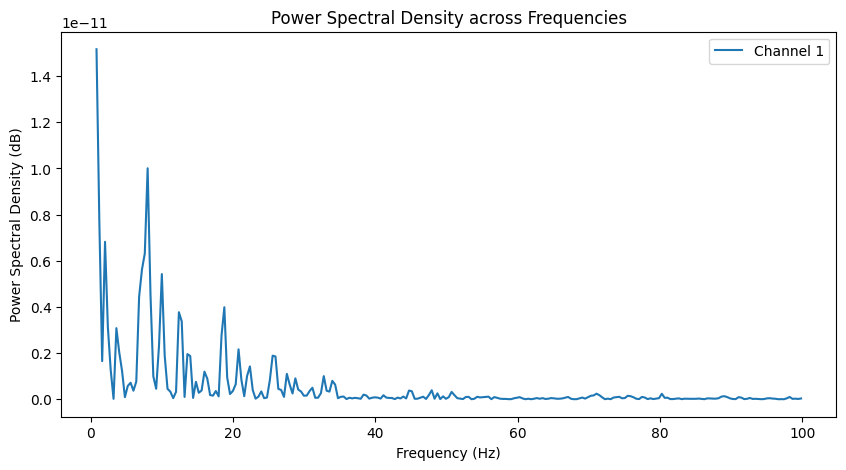

In [ ]:

import matplotlib.pyplot as plt

# # Choose a channel to plot
channel_index = 0  # Change as needed
plt.figure(figsize=(10, 5))
plt.plot(freqs, psds[0, channel_index, :], label=f'Channel {channel_index+1}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('Power Spectral Density across Frequencies')
plt.legend()
plt.show()

### Checking Saved PSD file .h5 format


In [ ]:
import h5py

# Define the file path for the single PSD file you have processed
file_path = '/content/drive/MyDrive/FinalFilterOuput/PSD_Subject_1_Inner_ALL_PSD-tfr.h5'

# Load the data from the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Load the PSD data
    psds = f['mnepython/key_data'][:]
    # You may need to adjust these paths based on your actual structure
    freqs = f['mnepython/key_dims/idx_2'][:]  # Assuming these are frequency bins
    # Check if there are labels stored in the file, you may need to adjust the path
    labels = f['mnepython/key_dims/idx_0'][:] if 'mnepython/key_dims/idx_0' in f else None

# Print the shape of the loaded data
print("Loaded PSDs shape:", psds.shape)
print("Loaded Frequency bins:", freqs.shape)

if labels is not None:
    print("Loaded Labels shape:", labels.shape)
    print("First few labels:", labels[:5])

# Print basic statistics of the PSD data
print("PSD Data Statistics:")
print("Mean:", psds.mean())
print("Standard Deviation:", psds.std())
print("Min:", psds.min())
print("Max:", psds.max())

# Example of printing the first few PSD values for the first channel
print("First few PSD values for the first channel:", psds[0, 0, :10])


Loaded PSDs shape: (200, 128, 249)
Loaded Frequency bins: (4,)
Loaded Labels shape: (5,)
First few labels: [101 112 111  99 104]
PSD Data Statistics:
Mean: 1.1692361473167383e-12
Standard Deviation: 1.6486587279738783e-10
Min: 4.404309059090443e-20
Max: 3.8468860274689486e-07
First few PSD values for the first channel: [5.58310692e-13 6.88665798e-12 2.76898044e-12 2.81986455e-12
 1.37722359e-13 3.77932348e-12 2.76836888e-12 2.82697794e-12
 1.51178302e-12 1.76842952e-12]


## **Computer PSD On A Multiple Files**

In [ ]:
import numpy as np
import mne

### ---- Processing Variables ---- ###

# Save options
save_bool = False
overwrite = True

# Subjets list
N_S_list=[2]
# N_S_list = [1,2, 3, 4, 5, 6,7,8,9,10]  # for training
# N_S_list = [2,7,8,9]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
tmin = 0.5
tmax = 3

# PSD Parameters
fmin = 0.5
fmax = 100
n_overlap = 0
n_fft = 256
picks = "all"
average = "mean"

# Load data from the first subject to get the channel names
N_S = 1
N_B = 1

X_S, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)
print("Extracting Data from 1 block to get channel names")
channel_names = X_S.ch_names
print("Channel names:", channel_names)

# Initialize an empty list to hold all the epochs data
all_epochs_data = []
all_labels = []

# Loop through all subjects
for N_S in N_S_list:
    print("Subject: " + str(N_S))

    # Load the data for the subject
    X_s, Y = extract_data_from_subject(root_dir, N_S, datatype="eeg")

    # Filter by condition
    X_cond, Y_cond = filter_by_condition(X_s, Y, condition=Cond)

    # Filter by class
    X_cond, Y_cond = filter_by_class(X_cond, Y_cond, Classes)

    # Append the data to the list
    all_epochs_data.append(X_cond)
    all_labels.append(Y_cond)

    print("X_cond shape:", X_cond.shape)
    print("Y_cond shape:", Y_cond.shape)
    print("First few X_cond values:", X_cond[:2])
    print("First few Y_cond values:", Y_cond[:2])

# Stack all the data
X_data = np.vstack(all_epochs_data)
Y_data = np.vstack(all_labels)
print("Combined X_data shape:", X_data.shape)
print("Combined Y_data shape:", Y_data.shape)
print("First few X_data values:", X_data[:2])
print("First few Y_data values:", Y_data[:2])

# Create an MNE Info object with correct channel names
info = mne.create_info(ch_names=channel_names, sfreq=256, ch_types="eeg")
print("MNE Info object created with channel names and sampling frequency.")
print(info)

# Create the epochs object
epochs_combined = mne.EpochsArray(X_data, info)
print("EpochsArray object created with combined data.")
print(epochs_combined)
# Set the montage
montage = mne.channels.make_standard_montage("biosemi128")
print("Montage object created with biosemi128 montage.")
print(montage)
epochs_combined.set_montage(montage, match_case=False)
print("Montage set for the EpochsArray object.")
print(epochs_combined)
# Calculate PSD
print("Calculating PSD for the combined data...")
psd_result = epochs_combined.compute_psd(method='welch', fmin=fmin, fmax=fmax, tmin=tmin, tmax=tmax, picks=picks)

# Extract PSD values and frequency bins from the Power Spectrum object
psds = psd_result.get_data()
freqs = psd_result.freqs

# Print some statistics for verification
print("PSDs shape:", psds.shape)
print("Frequency bins shape:", freqs.shape)
print("First few PSD values for the first channel:", psds[0, 0, :10])

# Save PSD results
save_dir = "/content/drive/MyDrive/FinalFilterOuput"
file_name = save_dir + "/All_Subjects_PSD_combined_PSD-tfr.npz"
print("Saving PSD results to:", file_name)
np.savez(file_name, psds=psds, freqs=freqs, labels=Y_data)

print("PSD calculation and saving completed.")


Extracting Data from 1 block to get channel names
Channel names: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32']
Subject: 2
X_cond shape: (240, 128, 1153)
Y_cond shape: (240, 4)
First few

## **Model Train**

### Model Train on Single file

#### Load the Data

In [ ]:
import numpy as np

# Define the path to load the npz file
npz_load_path = '/content/drive/MyDrive/FinalFilterOuput/PSD_combined_PSD-tfr.npz'

# Load the data from the npz file
data = np.load(npz_load_path)

print(data)
# # Extract PSDs and frequency bins
psds = data['psds']
freqs = data['freqs']
labels= data['labels']

# Print the shape of the loaded data

print("Loaded PSDs shape:", psds.shape)
print(psds[:1])
print("Loaded Frequency bins shape:", freqs.shape)
print(freqs[:10])
print("Loaded Labels shape:", labels.shape)
print(labels[:10])

NpzFile '/content/drive/MyDrive/FinalFilterOuput/PSD_combined_PSD-tfr.npz' with keys: psds, freqs, labels
Loaded PSDs shape: (1316, 128, 249)
[[[1.51636208e-11 7.68882141e-12 1.64987982e-12 ... 2.44598148e-14
   1.21454432e-14 3.23524730e-14]
  [1.43350472e-11 7.34710662e-12 2.02088469e-12 ... 3.02456991e-15
   1.27520225e-15 3.66522148e-14]
  [1.44793708e-11 7.61140754e-12 2.00231467e-12 ... 1.36192863e-14
   1.58106593e-14 3.18731430e-14]
  ...
  [2.41929065e-12 1.13674614e-11 4.44848201e-13 ... 1.02473850e-13
   2.13724987e-13 1.17201110e-13]
  [4.67206044e-12 6.98626960e-12 5.04328584e-12 ... 2.77688178e-13
   3.24863004e-13 1.34013751e-13]
  [4.87694102e-12 6.87090857e-12 4.68513193e-12 ... 2.00104786e-13
   2.67097852e-13 1.01777490e-13]]]
Loaded Frequency bins shape: (249,)
[0.79875195 1.19812793 1.5975039  1.99687988 2.39625585 2.79563183
 3.1950078  3.59438378 3.99375975 4.39313573]
Loaded Labels shape: (1316, 4)
[[351788      1      1      1]
 [358546      1      1      1]
 [

#### Spliting Dataset


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Reshape PSD data for CNN input
# Current shape is (200, 128, 249)
# Required shape is (200, 128, 249, 1) for CNN input
psds = psds[..., np.newaxis]

print(psds.shape)
# One-hot encode labels (assuming labels are in the second column of the labels array)
encoder = OneHotEncoder(sparse=False)
labels_one_hot = encoder.fit_transform(labels[:, 1].reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(psds, labels_one_hot, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test[:10])
print("Testing labels shape:", y_test.shape)


(1316, 128, 249, 1)
Training data shape: (1052, 128, 249, 1)
Testing data shape: (264, 128, 249, 1)
Training labels shape: (1052, 4)
Testing labels shape: [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
Testing labels shape: (264, 4)


#### Train Model

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 249, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels[:, 1])), activation='softmax')  # Number of classes should match the number of unique labels
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
5/5 [==============================] - 16s 2s/step - loss: 1.3868 - accuracy: 0.2000 - val_loss: 1.3859 - val_accuracy: 0.2750
Epoch 2/10
5/5 [==============================] - 14s 3s/step - loss: 1.3908 - accuracy: 0.2750 - val_loss: 1.3858 - val_accuracy: 0.2750
Epoch 3/10
5/5 [==============================] - 14s 3s/step - loss: 1.3856 - accuracy: 0.2688 - val_loss: 1.3863 - val_accuracy: 0.2000
Epoch 4/10
5/5 [==============================] - 13s 3s/step - loss: 1.3863 - accuracy: 0.2250 - val_loss: 1.3864 - val_accuracy: 0.2000
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 1.3863 - accuracy: 0.2937 - val_loss: 1.3870 - val_accuracy: 0.2000
Epoch 6/10
5/5 [==============================] - 12s 2s/step - loss: 1.3862 - accuracy: 0.2688 - val_loss: 1.3876 - val_accuracy: 0.2000
Epoch 7/10
5/5 [==============================] - 14s 3s/step - loss: 1.3859 - accuracy: 0.2500 - val_loss: 1.3878 - val_accuracy: 0.2000
Epoch 8/10
5/5 [==================

## **Model training on testing and training file**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define file paths
training_file_path = '/content/drive/MyDrive/FinalFilterOuput/PSD_combined_PSD-tfr.npz'
testing_file_path = '/content/drive/MyDrive/FinalFilterOuput/Testing_PSD_combined_PSD-tfr.npz'

# Load the training data
training_data = np.load(training_file_path)
psds_train = training_data['psds']
freqs_train = training_data['freqs']
labels_train = training_data['labels']

# Load the testing data
testing_data = np.load(testing_file_path)
psds_test = testing_data['psds']
freqs_test = testing_data['freqs']
labels_test = testing_data['labels']

# Print data shapes
print("Training PSDs shape:", psds_train.shape)
print("Training labels shape:", labels_train.shape)
print("Testing PSDs shape:", psds_test.shape)
print("Testing labels shape:", labels_test.shape)

# Reshape PSD data for CNN input
psds_train = psds_train[..., np.newaxis]
psds_test = psds_test[..., np.newaxis]

# One-hot encode labels (assuming labels are in the second column of the labels array)
encoder = OneHotEncoder(sparse=False)
labels_train_one_hot = encoder.fit_transform(labels_train[:, 1].reshape(-1, 1))
labels_test_one_hot = encoder.transform(labels_test[:, 1].reshape(-1, 1))

# Print reshaped data shapes
print("Reshaped training PSDs shape:", psds_train.shape)
print("Reshaped testing PSDs shape:", psds_test.shape)
print("One-hot encoded training labels shape:", labels_train_one_hot.shape)
print("One-hot encoded testing labels shape:", labels_test_one_hot.shape)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(psds_train, labels_train_one_hot, test_size=0.2, random_state=42)

# Print shapes
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 249, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels_train_one_hot.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))



# Print model summary
model.summary()


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(psds_test, labels_test_one_hot)
print(f"Input Accuracy: {test_accuracy * 100:.2f}%")


# **--------------------------- FOR CSP \------------------------------------**



### Extract CSP Function

## Single File

In [11]:
### ---- Processing Variables ---- ###

# Save options
save_bool = True
overwrite = True

# Subjects list
N_S=1

# The root dir has to point to the folder that contains the database
root_dir = "/content/drive/MyDrive/FYPD_Dataset"
save_dir = "/content/drive/MyDrive/FinalFilterOuput"


# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate

def extract_features_using_csp(root_dir, N_S, t_start, t_end, fs):
    try:
        # Load all trials for a single subject
        X, Y = extract_data_from_subject(root_dir, N_S, datatype)

        # Cut useful time. i.e action interval
        X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

        # Filter By condition i.e Inner
        X, Y = filter_by_condition(X, Y, condition='Inner')

        # Filter By class i.e ALL classes
        X, Y = filter_by_class(X, Y, 'ALL')

        # Define CSP parameters
        n_components = 50  # Number of CSP components
        reg_param = 0.01

        # Initialize CSP with regularization
        csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)

        # Fit CSP on training data and transform data
        X_csp = csp.fit_transform(X, Y[:, 1])  # Assuming class labels are in the second column of Y

        return X_csp, Y
    except Exception as e:
        print(f"Error processing subject {N_S}: {e}")
        return None, None

# file_name = '/content/drive/MyDrive/FYPD_Dataset/derivatives/sub-01/ses-01/sub-01_ses-01_baseline-epo.fif'
extract_features_using_csp(root_dir, N_S, t_start, t_end, fs)


(array([[-1.90870606, -0.2937742 , -0.40836446, ..., -0.86416368,
         -0.67967549, -0.87755534],
        [ 0.19074052, -0.48813008,  0.07289032, ...,  0.14511962,
         -0.30840636, -0.9340081 ],
        [-1.54598615, -0.75831237, -0.63416518, ..., -0.41448704,
         -0.45770625, -0.81797995],
        ...,
        [-0.75280051, -2.17085903, -0.60161986, ...,  0.30320111,
         -0.52016387, -0.81588707],
        [-0.61108261, -2.49942982, -0.51414441, ..., -0.61194312,
         -0.2529977 , -1.10559762],
        [ 1.20592445, -2.21764679, -0.37757868, ...,  0.1836271 ,
         -0.48424854, -1.0093528 ]]),
 array([[ 351788,       1,       1,       1],
        [ 358546,       1,       1,       1],
        [ 365390,       3,       1,       1],
        [ 372216,       3,       1,       1],
        [ 387985,       3,       1,       1],
        [ 394471,       0,       1,       1],
        [ 400870,       2,       1,       1],
        [ 407629,       3,       1,       1],
     

## For Multiple Files

## Full Code CSP Extraction for Subjects

In [ ]:
import numpy as np
import mne
from mne.decoding import CSP

### ---- Processing Variables ---- ###

# Save options
save_bool = True
overwrite = True

# Subjects list for training
N_S_list = [1,2,3,4,5,6,7,8,9,10]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate

# Define CSP parameters
n_components = 50  # Number of CSP components
reg_param = 0.01

### Define Functions ###

def extract_features_using_csp(root_dir, N_S, t_start, t_end, fs):
    try:
        # Load all trials for a single subject
        X, Y = extract_data_from_subject(root_dir, N_S, datatype)

        # Cut useful time. i.e action interval
        X = select_time_window(X=X, t_start=t_start, t_end=t_end, fs=fs)

        # Filter By condition i.e Inner
        X, Y = filter_by_condition(X, Y, condition='Inner')

        # Filter By class i.e ALL classes
        X, Y = filter_by_class(X, Y, 'ALL')

        # Initialize CSP with regularization
        csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)

        # Fit CSP on training data and transform data
        X_csp = csp.fit_transform(X, Y[:, 1])  # Assuming class labels are in the second column of Y

        return X_csp, Y
    except Exception as e:
        print(f"Error processing subject {N_S}: {e}")
        return None, None

### ---- Main Processing Loop ---- ###

# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")

    # Extract and process features for each subject
    features, labels = extract_features_using_csp(root_dir, N_S, t_start, t_end, fs)

    if features is not None and labels is not None:
        # Save the data for the individual subject
        save_dir = "/content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects"
        file_name = save_dir + f"/Subject_{N_S}_50_CSP_Features.npz"
        print(f"Saving features and labels for subject {N_S} to: {file_name}")
        np.savez(file_name, features=features, labels=labels)
        print("Saving completed for subject:", N_S)


Processing Subject: 1
Saving features and labels for subject 1 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_1_50_CSP_Features.npz
Saving completed for subject: 1
Processing Subject: 2
Saving features and labels for subject 2 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_2_50_CSP_Features.npz
Saving completed for subject: 2
Processing Subject: 3
Saving features and labels for subject 3 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_3_50_CSP_Features.npz
Saving completed for subject: 3
Processing Subject: 4
Saving features and labels for subject 4 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_4_50_CSP_Features.npz
Saving completed for subject: 4
Processing Subject: 5
Saving features and labels for subject 5 to: /content/drive/MyDrive/FinalFilterOuput/subjects/all_csp_50_subjects/Subject_5_50_CSP_Features.npz
Saving completed for subject: 5
Processing

In [ ]:

### ---- Save the Combined Data ---- ###

if save_bool:
    save_dir = "/content/drive/MyDrive/FinalFilterOuput"
    file_name = save_dir + "/CombinedFile_6Subjects_50_testing_CSP_Features.npz"
    print(f"Saving combined features and labels to: {file_name}")
    np.savez(file_name, features=X_data, labels=Y_data)
    print("Saving completed.")

Saving combined features and labels to: /content/drive/MyDrive/FinalFilterOuput/CombinedFile_6Subjects_50_testing_CSP_Features.npz
Saving completed.


## Full Code with blocks

In [ ]:
import numpy as np
import mne
from mne.decoding import CSP

### ---- Processing Variables ---- ###

# Save options
save_bool = True
overwrite = True

# Subjects list for training
N_S_list = [1,2,3,7]

# Data filtering
datatype = "eeg"
Cond = "Inner"
Classes = "ALL"

# Time window
t_start = 0.5
t_end = 3
fs = 256  # Sampling rate


# Define CSP parameters
n_components = 50  # Number of CSP components
reg_param = 0.01


### Define Functions ###

data = dict()
y = dict()
n_b_arr = [1, 2, 3]
datatype = datatype.lower()

def extract_features_using_csp(root_dir, N_S, N_B):
    try:
        # .fif
        # Load all trials for a single subject
        X, Y = extract_block_data_from_subject(root_dir, N_S, datatype, N_B)
        print("Extracted from block")

        X = X.get_data()  # Convert EpochsFIF object to numpy array
        print("X shape:", X.shape)
        print("Y shape:", Y.shape)


        # Cut useful time. i.e action interval
        print("startijg cut")
        X = select_time_window(X, t_start, t_end, fs)
        print("Cut useful time")
        print("X shape:", X.shape)
        print("Y shape:", Y.shape)


        # # Filter By condition i.e Inner
        X, Y = filter_by_condition(X, Y, condition='Inner')
        print("Filtered by condition")
        print("X shape:", X.shape)
        print("Y shape:", Y.shape)

        # # Filter By class i.e ALL classes
        X, Y = filter_by_class(X, Y, 'ALL')
        print("Filtered by class")
        print("X shape:", X.shape)
        print("Y shape:", Y.shape)


        # Initialize CSP with regularization
        csp = CSP(n_components=n_components, reg=reg_param, log=True, norm_trace=False)
        print("Initialized CSP")

        # Fit CSP on training data and transform data
        X_csp = csp.fit_transform(X, Y[:, 1])  # Assuming class labels are in the second column of Y

        return X_csp, Y
    except Exception as e:
        print(f"Error processing subject {N_S}: {e}")
        return None, None



### ---- Main Processing Loop ---- ###

# Initialize lists to hold all features and labels
all_features = []
all_labels = []

for N_S in N_S_list:
    print(f"Processing Subject: {N_S}")
    for N_B in n_b_arr:
        # Extract and process features for each subject
        features, labels = extract_features_using_csp(root_dir, N_S, N_B)
        if features is not None and labels is not None:
            # Append the data to the lists
            all_features.append(features)
            all_labels.append(labels)

        # Stack all the features and labels
        X_data = np.vstack(all_features)
        Y_data = np.vstack(all_labels)
        print("Combined Features shape:", X_data.shape)
        print("Combined Labels shape:", Y_data.shape)
        print("First few combined features:\n", X_data[:1])
        print("First few combined labels:\n", Y_data[:1])

        ### ---- Save the Combined Data ---- ###

        if save_bool:
            save_dir = "/content/drive/MyDrive/FinalFilterOuput/blocks/testing_blocks"
            # subject_dir = os.path.join(save_dir, f"subject_{N_S}_block_{N_B}")
            file_name = os.path.join(save_dir, f"subject_{N_S}_block_{N_B}_testing_50_CSP_Features.npz")
            print(file_name)
            print(f"Saving combined features and labels to: {file_name}")
            np.savez(file_name, features=X_data, labels=Y_data)
            print("Saving completed.")

Processing Subject: 1
Extracted from block
X shape: (200, 128, 1153)
Y shape: (200, 4)
startijg cut
Cut useful time
X shape: (200, 128, 640)
Y shape: (200, 4)
Filtered by condition
X shape: (80, 128, 640)
Y shape: (80, 4)
Filtered by class
X shape: (80, 128, 640)
Y shape: (80, 4)
Initialized CSP
Combined Features shape: (80, 50)
Combined Labels shape: (80, 4)
First few combined features:
 [[-5.42692749e-01 -7.52381089e-01 -9.10612063e-01 -6.52884440e-01
  -9.39154304e-01 -9.53509329e-01 -6.36207460e-01 -3.69657630e-01
  -4.18298506e-01 -5.01737032e-01 -5.40887299e-01 -2.83785063e-01
  -5.69273779e-01 -8.70913827e-01 -1.02417583e+00 -7.62334466e-01
  -3.49904629e-01 -1.16002869e+00 -6.27291811e-01 -8.15261020e-01
  -1.37893901e+00 -6.65562991e-01 -7.65423783e-01 -3.21321987e-02
   1.58032142e-03 -9.13613087e-01 -2.91678251e-01 -3.93717748e-01
  -5.03211218e-01  1.55279582e-01 -5.75695112e-02 -1.54053315e+01
  -9.13320841e-01 -4.54077800e-01 -1.51879995e+00  2.07898379e-01
  -9.89275773e

Saving combined features and labels to: /content/drive/MyDrive/FinalFilterOuput/CombinedFile_6Subjects_50_testing_CSP_Features.npz
Saving completed.


# **--------------------------- Model Training \------------------------------------**



### Load and Inspect the numpy File

In [ ]:
import pandas as pd
import numpy as np

# file_name_csp='/content/drive/MyDrive/FinalFilterOuput/50_Combined_CSP_Features.npz'
file_name_csp="/content/drive/MyDrive/FinalFilterOuput/CombinedFile_6Subjects_50_testing_CSP_Features.npz"
# Load the .npz file
data = np.load(file_name_csp)

# List all arrays in the .npz file
print(data.files)

['features', 'labels']


In [ ]:
data['labels'].shape

(1316, 4)

In [ ]:

labels= data['labels']
labels= labels[:, 1]
labels.shape

(1316,)

In [ ]:
unique, frequency = np.unique(labels,
                              return_counts = True)

# convert both into one numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",
     count)

The values and their frequency are:
 [[  0   1   2   3]
 [329 329 329 329]]



### Data Cleaning and preparation for numpy files

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib


# Assuming 'Feature' and 'Label' are keys in the npz file
features = data['features']

# Function to clean feature strings
def clean_feature_string(feature_str):
    if isinstance(feature_str, str):
        cleaned = feature_str.strip('[]').replace(' ', ',').replace('\n', '')
        return cleaned.split(',') if cleaned else []
    return feature_str  # If it's already a list or array, return as is

# Convert the feature strings to lists of floats
cleaned_features = []
for feature in features:
    cleaned_feature = clean_feature_string(feature)
    if len(cleaned_feature) == 0:
        cleaned_feature = [0.0] * 10  # Handle empty features by filling with placeholder
    cleaned_features.append([float(i) for i in cleaned_feature])

# Convert cleaned_features to a numpy array
X = np.array(cleaned_features)
y = labels

# Optional: Split the data into training and testing sets

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to categorical (if using TensorFlow/Keras)
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

print("First few rows of scaled features:")
print(X_train[:5])
print("First few labels (one-hot encoded):")
print(y_train[:5])

print("Data cleaning and preparation complete.")
'''


'\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Convert labels to categorical (if using TensorFlow/Keras)\nnum_classes = len(np.unique(y))\ny_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)\ny_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)\n\nprint("First few rows of scaled features:")\nprint(X_train[:5])\nprint("First few labels (one-hot encoded):")\nprint(y_train[:5])\n\nprint("Data cleaning and preparation complete.")\n'

In [ ]:
num_classes = len(np.unique(y))
y = tf.keras.utils.to_categorical(y, num_classes=num_classes)
y.shape

(1316, 4)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:

# Save the scaler to disk for later use
scaler_path = '/content/drive/MyDrive/MyOutput/Maham_final_final_training_scaler.pkl'  # Adjust the path as needed
joblib.dump(scaler, scaler_path)

['/content/drive/MyDrive/MyOutput/Maham_final_final_training_scaler.pkl']

In [ ]:
np.unique(y)

array([0., 1.], dtype=float32)

### CNN MODEL

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# Reshape the features for CNN input
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.7),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjust the output layer based on the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test),
                    epochs=100, batch_size=16, callbacks=[early_stopping], verbose=2)

# Define the folder path and ensure it exists
folder_path = '/content/drive/MyDrive/MyOutput'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the file path where the model will be saved
model_file_path = os.path.join(folder_path, 'maham_final_cnn_model.h5')

# Save the model
model.save(model_file_path)
print(f'Model saved to {model_file_path}')

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'CNN Model Accuracy: {accuracy:.2%}')

# Make predictions and evaluate
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(y_test_classes, y_pred_classes)
print('CNN Model Classification Report:')
print(report)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 128)           512       
                                                                 
 batch_normalization (Batch  (None, 48, 128)           512       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 128)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               3

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CNN Model Accuracy: 79.55%
9/9 [==============================] - 0s 3ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        71
           1       0.82      0.80      0.81        70
           2       0.84      0.77      0.80        61
           3       0.86      0.77      0.81        62

    accuracy                           0.80       264
   macro avg       0.81      0.79      0.80       264
weighted avg       0.80      0.80      0.80       264



# **------------------------- Testing----------------------**

## Code Divided Into Sub Section

### Import File

In [13]:
import pandas as pd
import numpy as np


csp_file_name='/content/drive/MyDrive/FinalFilterOuput/blocks/testing_blocks/perfect_file_subject_3_session_2_features.npz' #35.42%
# Load the .npz file
new_data = np.load(csp_file_name)
# List all arrays in the .npz file
print(new_data.files)

# Access and print each array

for array_name in new_data.files:
    print(array_name)
    print(new_data[array_name])

new_data['features'].shape






['features', 'labels']
features
[[-0.47914291 -1.07751192 -0.00517946 ...  0.11359763 -0.59855766
  -0.31775656]
 [-1.37354186 -1.23698004 -0.86042252 ...  0.58564076 -0.68249015
  -0.42026212]
 [-1.46698821 -1.15753832 -0.40699506 ... -0.35917629 -0.83030881
  -0.24640215]
 ...
 [-1.12941973 -2.88219832 -0.41686651 ... -0.62519975 -0.16414139
   0.04592346]
 [-0.20065447 -2.8375033  -0.55897586 ... -0.3885809  -0.58971571
  -0.18187603]
 [-1.32155855 -2.3907183  -0.27109247 ... -0.59785253  0.73566575
   0.14722099]]
labels
[[355062      0      1      2]
 [361922      3      1      2]
 [368544      3      1      2]
 [375029      2      1      2]
 [381549      1      1      2]
 [388324      2      1      2]
 [395236      1      1      2]
 [401806      0      1      2]
 [408581      2      1      2]
 [415015      3      1      2]
 [421705      1      1      2]
 [428327      3      1      2]
 [435085      2      1      2]
 [441570      2      1      2]
 [455940      3      1      2]
 [46

(80, 50)

### Displaying Features and Labels

In [14]:
labels= new_data['labels']
labels= labels[:, 1]
print("Labels Shape ----> ", labels.shape)

unique, frequency = np.unique(labels,
                              return_counts = True)

# convert both into one numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",count)

Labels Shape ---->  (80,)
The values and their frequency are:
 [[ 0  1  2  3]
 [20 20 20 20]]


### Preprocess and clean npz

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib



# Load the .npz file

# Assuming 'Feature' and 'Label' are keys in the npz file
features = new_data['features']

# Function to clean feature strings
def clean_feature_string(feature_str):
    if isinstance(feature_str, str):
        cleaned = feature_str.strip('[]').replace(' ', ',').replace('\n', '')
        return cleaned.split(',') if cleaned else []
    return feature_str  # If it's already a list or array, return as is

# Convert the feature strings to lists of floats
cleaned_features = []
for feature in features:
    cleaned_feature = clean_feature_string(feature)
    if len(cleaned_feature) == 0:
        cleaned_feature = [0.0] * 10  # Handle empty features by filling with placeholder
    cleaned_features.append([float(i) for i in cleaned_feature])

# Convert cleaned_features to a numpy array
X_new = np.array(cleaned_features)
y_new = labels




###  Standardize features


In [16]:
# Standardize features
scaler_path = '/content/drive/MyDrive/MyOutput/PERFECT_training_scaler.pkl'
scaler = joblib.load(scaler_path)

X_new = scaler.transform(X_new)
print(X_new.shape)

# Reshape the data for the model if necessary (e.g., CNN input)
X_new_transformed = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)
print(X_new_transformed.shape)

(80, 50)
(80, 50, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Import Model

In [17]:
from tensorflow.keras.models import load_model


# Load the trained model
model_path ='/content/drive/MyDrive/MyOutput/PERFECT_cnn_model.h5'


model = load_model(model_path)
print(f"Model loaded from {model_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model loaded from /content/drive/MyDrive/MyOutput/PERFECT_cnn_model.h5


### Test Model

In [18]:

# Assuming model and data are already loaded and prepared
from sklearn.metrics import accuracy_score
predictions = model.predict(X_new_transformed)
predicted_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_new, predicted_classes)
print("Overall accuracy on test data: {:.2%}".format(accuracy))




3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
Overall accuracy on test data: 36.25%


## Statistical Analysis

### Classification Report:

In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_new, predicted_classes)
print('CNN Model Classification Report:')
print(report)


CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.80      0.51        20
           1       0.92      0.55      0.69        20
           2       0.08      0.10      0.09        20
           3       0.00      0.00      0.00        20

    accuracy                           0.36        80
   macro avg       0.34      0.36      0.32        80
weighted avg       0.34      0.36      0.32        80



### Confusion Matrix:

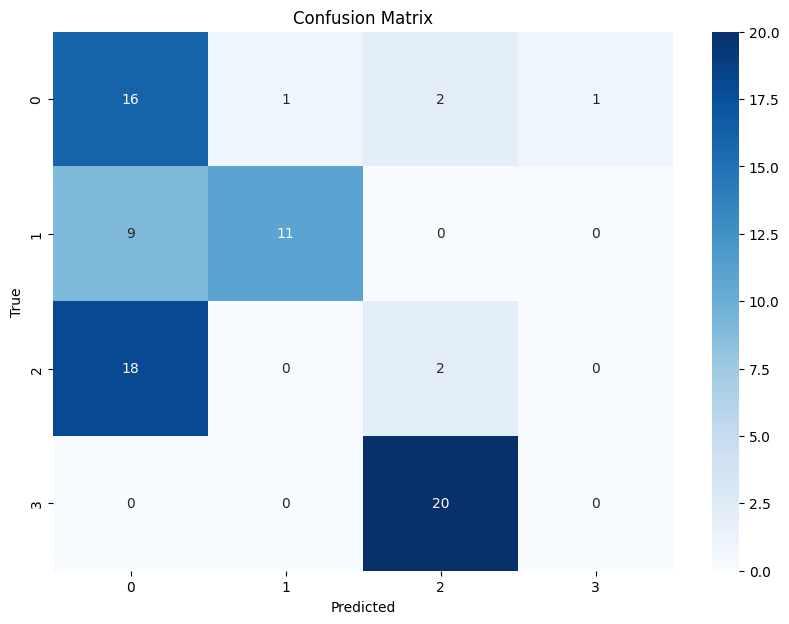

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_new, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_new), yticklabels=np.unique(y_new))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Precision, Recall, F1-Score:

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, f1-score
precision = precision_score(y_new, predicted_classes, average='weighted')
recall = recall_score(y_new, predicted_classes, average='weighted')
f1 = f1_score(y_new, predicted_classes, average='weighted')

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")


Precision: 34.30%
Recall: 36.25%
F1-Score: 32.16%


### ROC Curve and AUC:


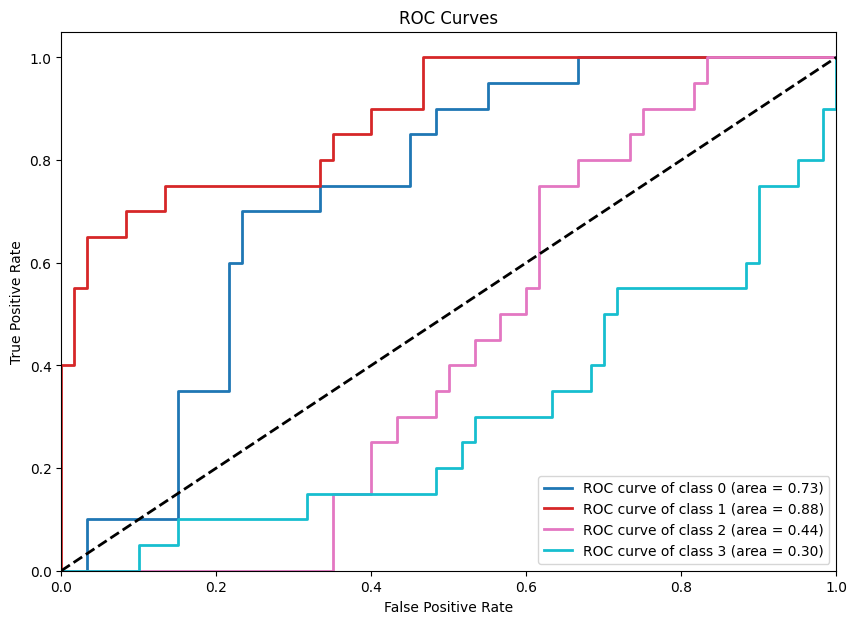

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC AUC
y_new_binarized = label_binarize(y_new, classes=np.unique(y_new))
n_classes = y_new_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_new_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap('tab10', n_classes)
for i, color in zip(range(n_classes), colors(range(n_classes))):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


### Class Distribution:

In [23]:
# Checking the distribution of the predicted classes
unique, counts = np.unique(predicted_classes, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class Distribution in Predictions:")
for key, value in class_distribution.items():
    print(f"Class {key}: {value} samples")


Class Distribution in Predictions:
Class 0: 43 samples
Class 1: 12 samples
Class 2: 24 samples
Class 3: 1 samples


### Statistical Analysis Report:

In [24]:
# Create a summary report
summary_report = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "class_distribution": class_distribution
}

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame(summary_report, index=[0])
print("Statistical Analysis Summary Report:")
print(summary_df)


Statistical Analysis Summary Report:
   accuracy  precision  recall  f1_score  class_distribution
0    0.3625   0.343023  0.3625  0.321586                  43


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib
from tensorflow.keras.models import load_model

csp_file_name='/content/drive/MyDrive/FinalFilterOuput/blocks/subject_2_block_3_testing_50_CSP_Features.npz' #35.42%

# Load the .npz file
new_data = np.load(csp_file_name)


new_data['features'].shape


# Preprocess and clean numpy file
labels= new_data['labels']
labels= labels[:, 1]
labels.shape


unique, frequency = np.unique(labels,
                              return_counts = True)

# convert both into one numpy array
count = np.asarray((unique, frequency ))

print("The values and their frequency are:\n",count)




# Load the .npz file

# Assuming 'Feature' and 'Label' are keys in the npz file
features = new_data['features']

# Function to clean feature strings
def clean_feature_string(feature_str):
    if isinstance(feature_str, str):
        cleaned = feature_str.strip('[]').replace(' ', ',').replace('\n', '')
        return cleaned.split(',') if cleaned else []
    return feature_str  # If it's already a list or array, return as is

# Convert the feature strings to lists of floats
cleaned_features = []
for feature in features:
    cleaned_feature = clean_feature_string(feature)
    if len(cleaned_feature) == 0:
        cleaned_feature = [0.0] * 10  # Handle empty features by filling with placeholder
    cleaned_features.append([float(i) for i in cleaned_feature])

# Convert cleaned_features to a numpy array
X_new = np.array(cleaned_features)
y_new = labels


# Standardize features
scaler_path = '/content/drive/MyDrive/MyOutput/final_training_scaler.pkl'
scaler = joblib.load(scaler_path)

X_new = scaler.transform(X_new)


print("Shape: ", X_new.shape)

# Reshape the data for the model if necessary (e.g., CNN input)
X_new_transformed = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)

print("X_new_transformed.shape", X_new_transformed.shape)


# Load the trained model
model_path ='/content/drive/MyDrive/MyOutput/final_cnn_model.h5'


model = load_model(model_path)
print(f"Model loaded from {model_path}")


# Assuming model and data are already loaded and prepared
from sklearn.metrics import accuracy_score
predictions = model.predict(X_new_transformed)
predicted_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_new, predicted_classes)
print("Overall accuracy on test data: {:.2%}".format(accuracy))

from sklearn.metrics import classification_report
report = classification_report(y_new, predicted_classes)
print('CNN Model Classification Report:')
print(report)



The values and their frequency are:
 [[ 0  1  2  3]
 [60 60 60 60]]
Shape:  (240, 50)
X_new_transformed.shape (240, 50, 1)
Model loaded from /content/drive/MyDrive/MyOutput/final_cnn_model.h5
8/8 [==============================] - 0s 7ms/step
Overall accuracy on test data: 32.92%
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.32      0.32        60
           1       0.28      0.32      0.30        60
           2       0.30      0.32      0.31        60
           3       0.42      0.37      0.39        60

    accuracy                           0.33       240
   macro avg       0.33      0.33      0.33       240
weighted avg       0.33      0.33      0.33       240

